In [378]:
import os

os.environ['DATA_DIRECTORY'] = '/Users/liamk/research-project-erc20-governance/data'

path = os.environ['DATA_DIRECTORY']
print(f"The data directory is set to: {path}")

The data directory is set to: /Users/liamk/research-project-erc20-governance/data


In [379]:
import pandas as pd

print(f"The version of pandas installed is: {pd.__version__}")


The version of pandas installed is: 2.2.2


In [272]:
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()  

data_directory = os.environ.get('DATA_DIRECTORY')

if not data_directory:
    raise EnvironmentError("DATA_DIRECTORY environment variable is not set.")

snapshot_file_path = os.path.join(data_directory, 'snapshot_selection.csv')
token_file_path = os.path.join(data_directory, 'final_token_selection.csv')

if not os.path.exists(snapshot_file_path):
    print(f"File does not exist: {snapshot_file_path}")
else:
    print(f"File exists: {snapshot_file_path}")

if not os.path.exists(token_file_path):
    print(f"File does not exist: {token_file_path}")
else:
    print(f"File exists: {token_file_path}")

try:
    df_snapshots = pd.read_csv(snapshot_file_path)
    df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
    print("Snapshot selection file loaded successfully. Here are the first few rows:")
    print(df_snapshots.head())
except Exception as e:
    print(f"Error reading snapshot selection file: {e}")

try:
    df_tokens = pd.read_csv(token_file_path)
    print("Final token selection file loaded successfully. Here are the first few rows:")
    print(df_tokens.head())
except Exception as e:
    print(f"Error reading final token selection file: {e}")

try:
    address_to_symbol = pd.Series(df_tokens['symbol'].values, index=df_tokens['address']).to_dict()
    print("Address to symbol dictionary created successfully.")
    print(list(address_to_symbol.items())[:5])  # Print the first 5 items
except Exception as e:
    print(f"Error creating address to symbol dictionary: {e}")

known_burner_addresses = [
    '0x0000000000000000000000000000000000000000',
    '0x0000000000000000000000000000000000000001',
    '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003',
    '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005',
    '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007',
    '0x000000000000000000000000000000000000dead'
]

print("Known burner addresses list:")
print(known_burner_addresses)

File exists: /Users/liamk/research-project-erc20-governance/data/snapshot_selection.csv
File exists: /Users/liamk/research-project-erc20-governance/data/final_token_selection.csv
Snapshot selection file loaded successfully. Here are the first few rows:
   Nr.  Block Height       Date
0    1       7962629 2019-06-15
1    2       8155117 2019-07-15
2    3       8354625 2019-08-15
3    4       8553607 2019-09-15
4    5       8745378 2019-10-15
Final token selection file loaded successfully. Here are the first few rows:
      coingecko_id     name    VL    MC  \
0          uniswap  Uniswap  True  True   
1             aave     Aave  True  True   
2         lido-dao     Lido  True  True   
3            maker    Maker  True  True   
4  curve-dao-token    Curve  True  True   

                                      address symbol  
0  0x1f9840a85d5af5bf1d1762f925bdaddc4201f984    UNI  
1  0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9   AAVE  
2  0x5a98fcbea516cf06857215779fd812ca3bef1b32    LDO  

In [273]:
import sys

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from src.analysis.clique_analysis import * 
from src.visualisations.wallet_network_projections_visualisations import * 

In [383]:
import networkx as nx
from dotenv import load_dotenv

load_dotenv()

input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
    
    return graphs, dates

data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")

Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

In [384]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
import pandas as pd
import numpy as np 
from src.utilities.metrics_and_tests import jaccard_similarity


def load_token_graphs_from_snapshots(df_snapshots, input_directory):
    """
    Load graphs from the given snapshots and store them in a dictionary.

    Parameters:
    df_snapshots (pd.DataFrame): DataFrame containing snapshot information with 'Block Height' and 'Date' columns.
    path (str): Base directory path where the graph files are located.

    Returns:
    dict: A dictionary containing loaded graphs with snapshot as the key.
    dict: A dictionary containing dates with snapshot as the key.
    """
    
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_token_projection_graph_{snapshot}.graphml")
        
        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
        else:
            print(f"Graph file for snapshot {snapshot} does not exist.")
    
    return graphs, dates

def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    """
    Load graphs from the given snapshots and store them in a dictionary.

    Parameters:
    df_snapshots (pd.DataFrame): DataFrame containing snapshot information with 'Block Height' and 'Date' columns.
    path (str): Base directory path where the graph files are located.

    Returns:
    dict: A dictionary containing loaded graphs with snapshot as the key.
    dict: A dictionary containing dates with snapshot as the key.
    """
    
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
        else:
            print(f"Graph file for snapshot {snapshot} does not exist.")
    
    return graphs, dates


def calculate_similarity_matrix(graphs):
    """
    Calculate the Jaccard Similarity matrix for a dictionary of graphs.

    Parameters:
    graphs (dict): A dictionary of graphs with snapshots as keys.

    Returns:
    np.ndarray: A 2D numpy array representing the similarity matrix.
    list: A sorted list of snapshot keys.
    """
    snapshot_list = sorted(graphs.keys())
    similarity_matrix = np.zeros((len(snapshot_list), len(snapshot_list)))

    for i, snapshot1 in enumerate(snapshot_list):
        for j, snapshot2 in enumerate(snapshot_list):
            if i <= j:
                similarity = jaccard_similarity(graphs[snapshot1], graphs[snapshot2])
                similarity_matrix[i, j] = similarity
                similarity_matrix[j, i] = similarity  # Symmetric matrix

    return similarity_matrix, snapshot_list


def visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory, layout=nx.kamada_kawai_layout):
    rows, cols = 3, 6  
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to iterate easily
    
    for ax, (snapshot, graph) in zip(axes, graphs.items()):
        relabeled_graph = nx.relabel_nodes(graph, address_to_symbol)
        
        pos = layout(relabeled_graph)  
        
        nx.draw(relabeled_graph, pos, ax=ax, with_labels=False, node_size=50, node_color='skyblue', edge_color='gray', font_size=8)
        ax.set_title(dates[snapshot], fontsize=10)
        ax.set_axis_off()  # Hide axis for clarity
        
        rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax.transAxes, clip_on=False)
        ax.add_patch(rect)

    for i in range(len(graphs), len(axes)):
        axes[i].set_axis_off()
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  
    
    fig.suptitle('Validated Wallet Projections Over Time', fontsize=16)
    plt.savefig(os.path.join(output_directory, "wallet_projection_grid.png"), format='png', dpi=300)
    plt.show()
    

def plot_similarity_heatmap(similarity_matrix, snapshot_list, dates, output_directory):
    """
    Plot a heatmap of the Jaccard Similarity matrix with diagonal elements set to NaN for better visualization.

    Parameters:
    similarity_matrix (np.ndarray): A 2D numpy array representing the similarity matrix.
    snapshot_list (list): A sorted list of snapshot keys.
    dates (dict): A dictionary of dates with snapshots as keys.
    """
    # Set diagonal elements to NaN
    np.fill_diagonal(similarity_matrix, np.nan)
    
    fig, ax = plt.subplots(figsize=(12, 10))  # Adjusted size to better fit more labels
    cax = ax.matshow(similarity_matrix, interpolation='nearest', cmap='coolwarm', vmin=0, vmax=np.nanmax(similarity_matrix))
    fig.colorbar(cax)

    date_labels = [dates[snapshot] for snapshot in snapshot_list]
    ax.set_xticks(range(len(snapshot_list)))
    ax.set_xticklabels(date_labels, rotation=90)  # Rotate for better readability
    ax.set_yticks(range(len(snapshot_list)))
    ax.set_yticklabels(date_labels)

    ax.xaxis.set_ticks_position('bottom')  # X-axis labels on the bottom

    ax.set_title('Jaccard Similarity Heatmap of Graph Snapshots', size=16, pad=20)

    ax.set_xlabel('Snapshot Date')
    ax.set_ylabel('Snapshot Date')
    
    plt.savefig(os.path.join(output_directory, "jaccard_similarity.png"), format='png', dpi=300)

    plt.show()


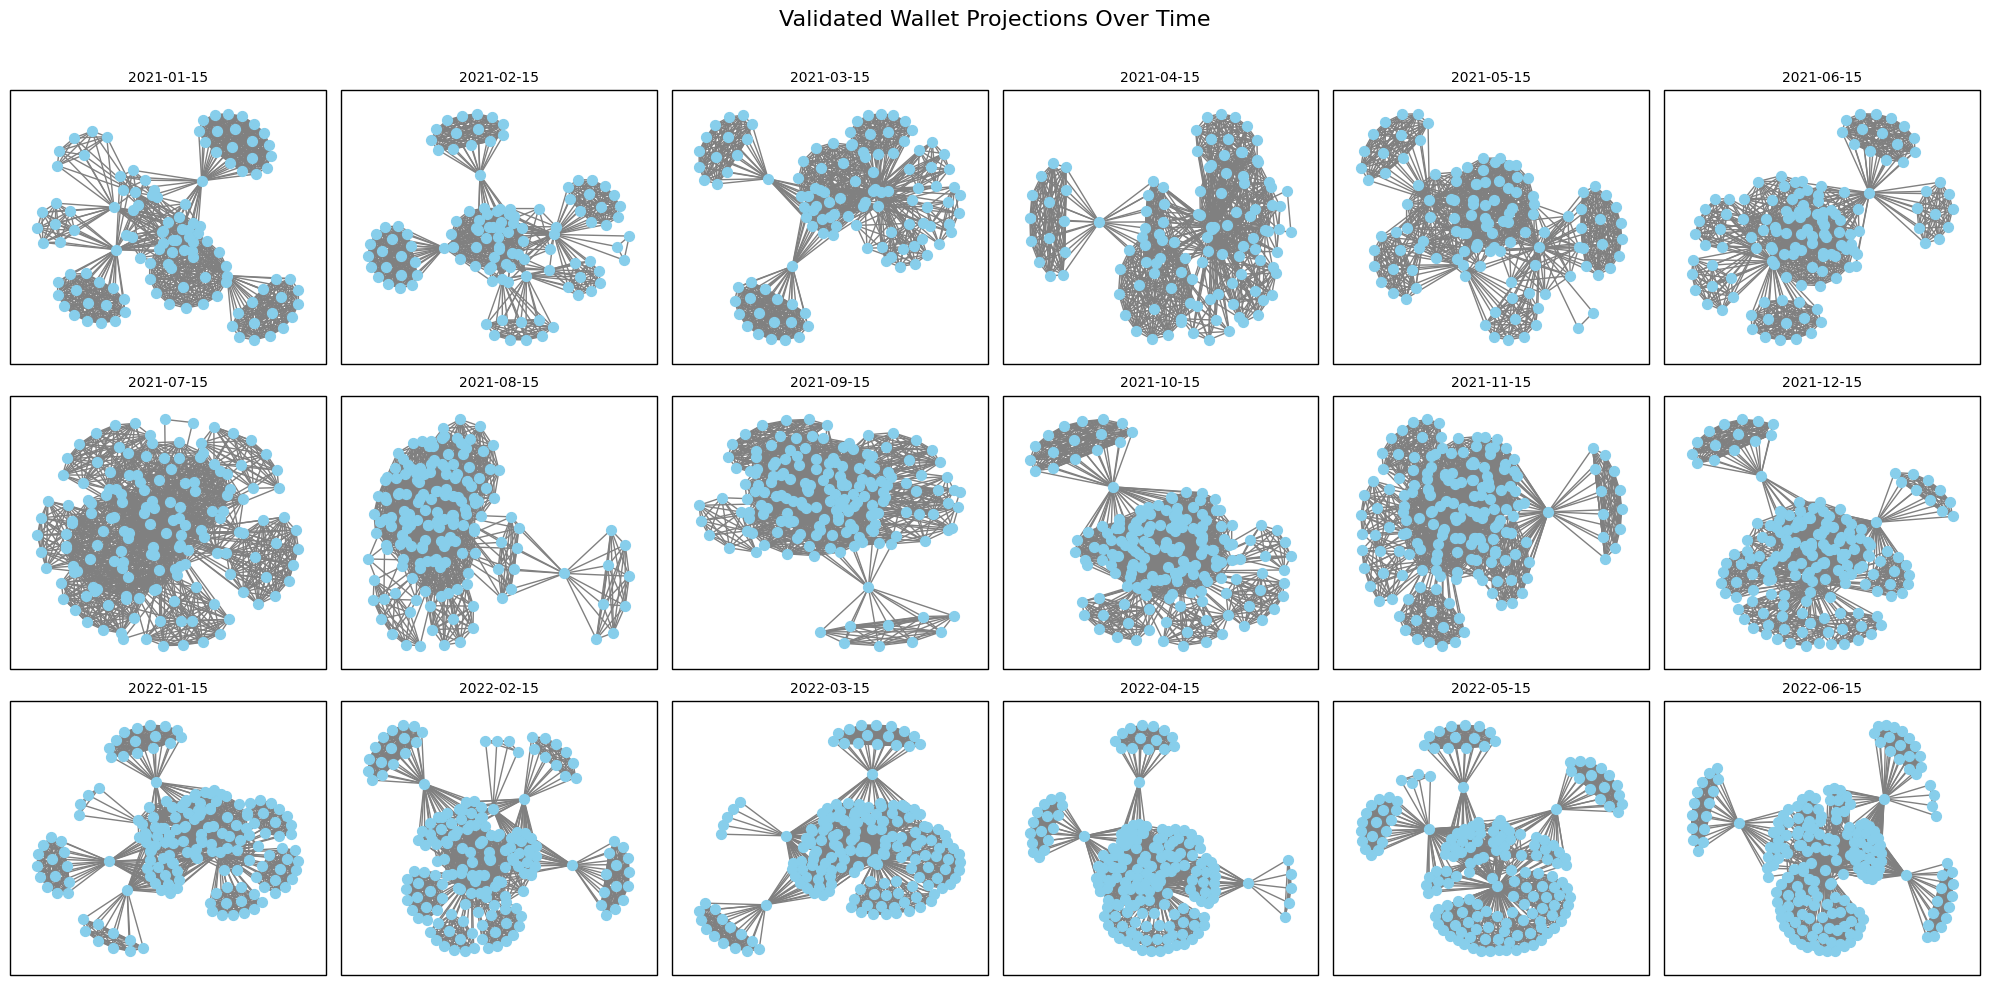

In [385]:
visualize_wallet_network_grid(graphs, dates, address_to_symbol, output_directory='../output/wallet_network_projections/', layout=nx.kamada_kawai_layout)


          11659570  11861210  12043054  12244515  12438842  12638919  \
11659570  1.000000  0.261128  0.170127  0.188627  0.153590  0.125000   
11861210  0.261128  1.000000  0.254478  0.275542  0.219138  0.143336   
12043054  0.170127  0.254478  1.000000  0.312936  0.241679  0.200548   
12244515  0.188627  0.275542  0.312936  1.000000  0.297610  0.206872   
12438842  0.153590  0.219138  0.241679  0.297610  1.000000  0.269679   
12638919  0.125000  0.143336  0.200548  0.206872  0.269679  1.000000   
12831436  0.118465  0.164671  0.150780  0.186554  0.245283  0.240320   
13029639  0.096060  0.122857  0.165701  0.234560  0.246883  0.275344   
13230157  0.119395  0.169679  0.133002  0.201666  0.217780  0.197581   
13422506  0.129735  0.129481  0.103836  0.130921  0.204941  0.208633   
13620205  0.109780  0.098219  0.098655  0.147992  0.154818  0.213159   
13809597  0.076923  0.076762  0.114693  0.111944  0.147155  0.168582   
14009885  0.101285  0.089192  0.093766  0.100000  0.135557  0.15

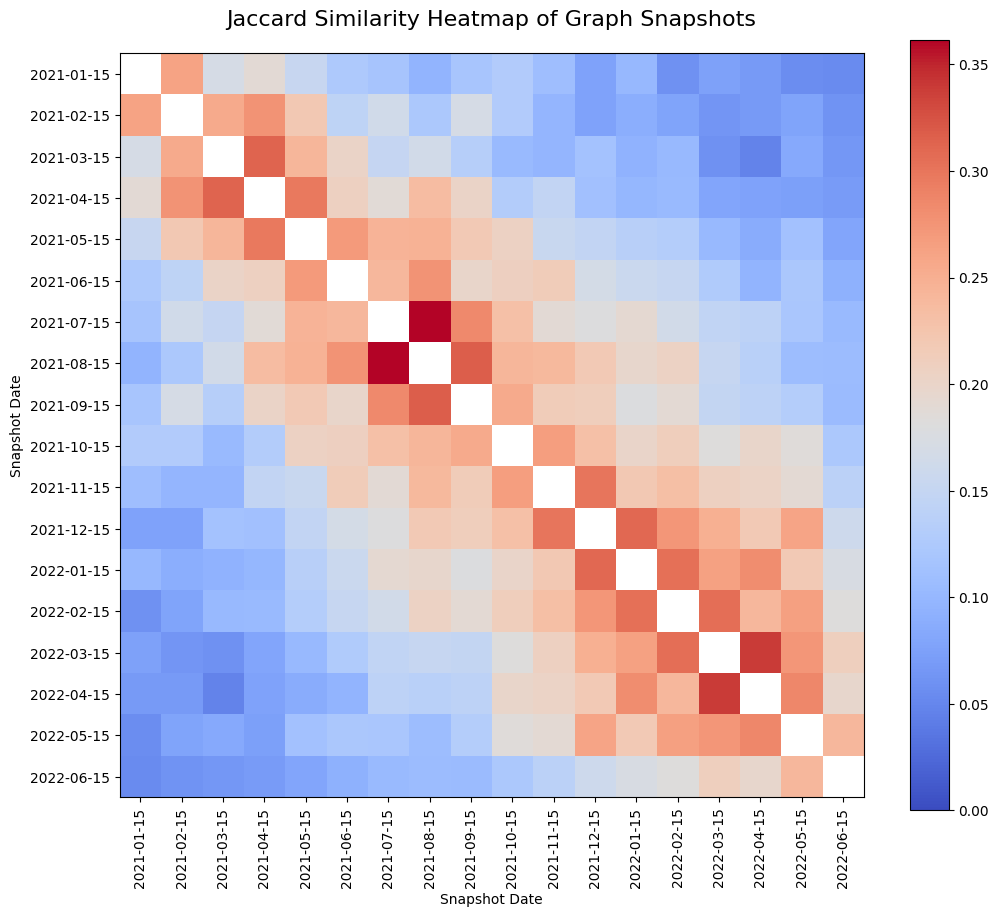

In [386]:
import numpy as np
import pandas as pd

def calculate_similarity_matrix(graphs):
    """
    Calculate the Jaccard Similarity matrix for a dictionary of graphs.

    Parameters:
    graphs (dict): A dictionary of graphs with snapshots as keys.

    Returns:
    np.ndarray: A 2D numpy array representing the similarity matrix.
    list: A sorted list of snapshot keys.
    """
    snapshot_list = sorted(graphs.keys())
    similarity_matrix = np.zeros((len(snapshot_list), len(snapshot_list)))

    for i, snapshot1 in enumerate(snapshot_list):
        for j, snapshot2 in enumerate(snapshot_list):
            if i <= j:
                similarity = jaccard_similarity(graphs[snapshot1], graphs[snapshot2])
                similarity_matrix[i, j] = similarity
                similarity_matrix[j, i] = similarity  # Symmetric matrix

    return similarity_matrix, snapshot_list

similarity_matrix, snapshot_list = calculate_similarity_matrix(graphs)

similarity_df = pd.DataFrame(similarity_matrix, index=snapshot_list, columns=snapshot_list)

print(similarity_df)

plot_similarity_heatmap(similarity_matrix, snapshot_list, dates, output_directory='../output/wallet_network_projections/')

In [387]:
similarity_df = pd.DataFrame(similarity_matrix, index=snapshot_list, columns=snapshot_list)
print(similarity_df)


          11659570  11861210  12043054  12244515  12438842  12638919  \
11659570       NaN  0.261128  0.170127  0.188627  0.153590  0.125000   
11861210  0.261128       NaN  0.254478  0.275542  0.219138  0.143336   
12043054  0.170127  0.254478       NaN  0.312936  0.241679  0.200548   
12244515  0.188627  0.275542  0.312936       NaN  0.297610  0.206872   
12438842  0.153590  0.219138  0.241679  0.297610       NaN  0.269679   
12638919  0.125000  0.143336  0.200548  0.206872  0.269679       NaN   
12831436  0.118465  0.164671  0.150780  0.186554  0.245283  0.240320   
13029639  0.096060  0.122857  0.165701  0.234560  0.246883  0.275344   
13230157  0.119395  0.169679  0.133002  0.201666  0.217780  0.197581   
13422506  0.129735  0.129481  0.103836  0.130921  0.204941  0.208633   
13620205  0.109780  0.098219  0.098655  0.147992  0.154818  0.213159   
13809597  0.076923  0.076762  0.114693  0.111944  0.147155  0.168582   
14009885  0.101285  0.089192  0.093766  0.100000  0.135557  0.15

# General network analysis

In [304]:
import networkx as nx
import pandas as pd

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],

    }

    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        
        data['Snapshot'].append(snapshot)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    
    return pd.DataFrame(data)

graph_stats = calculate_graph_statistics(graphs)

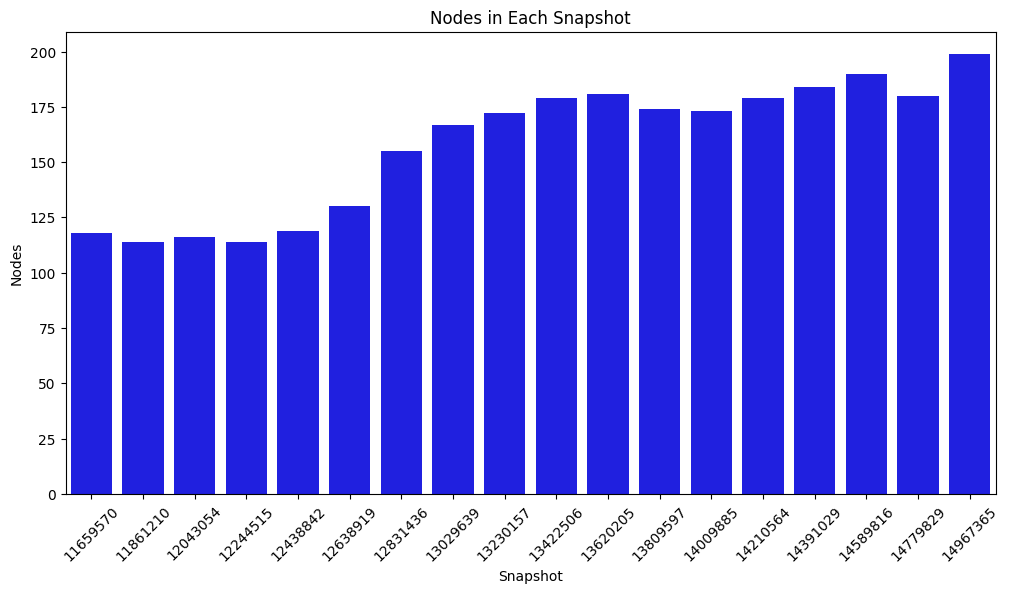

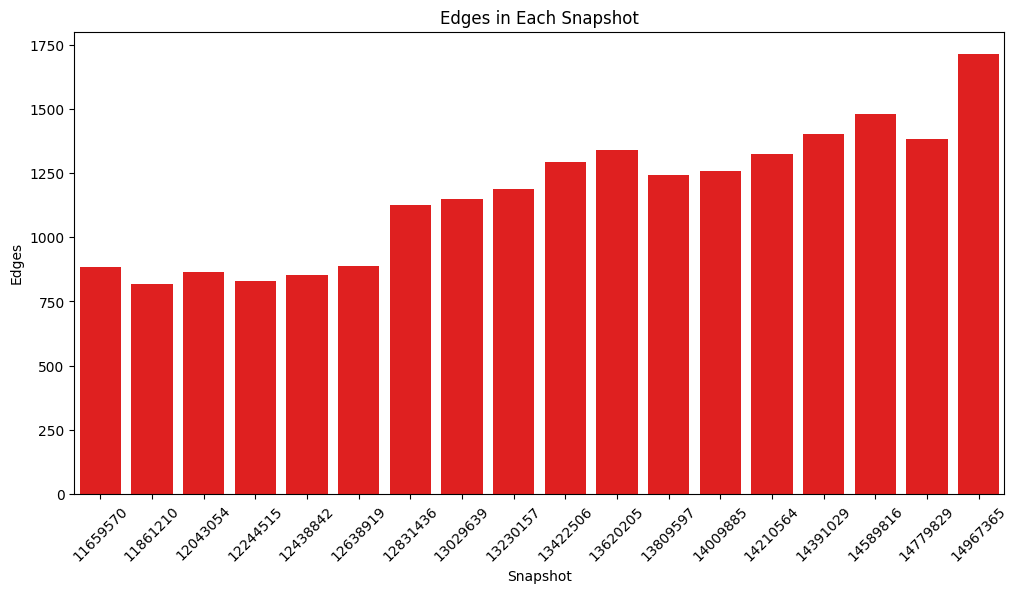

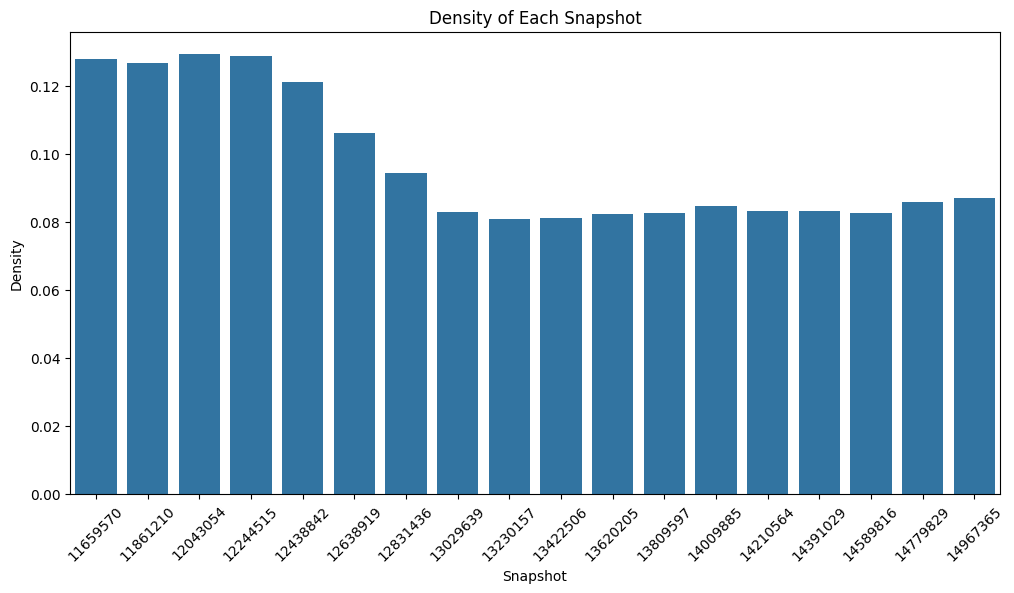

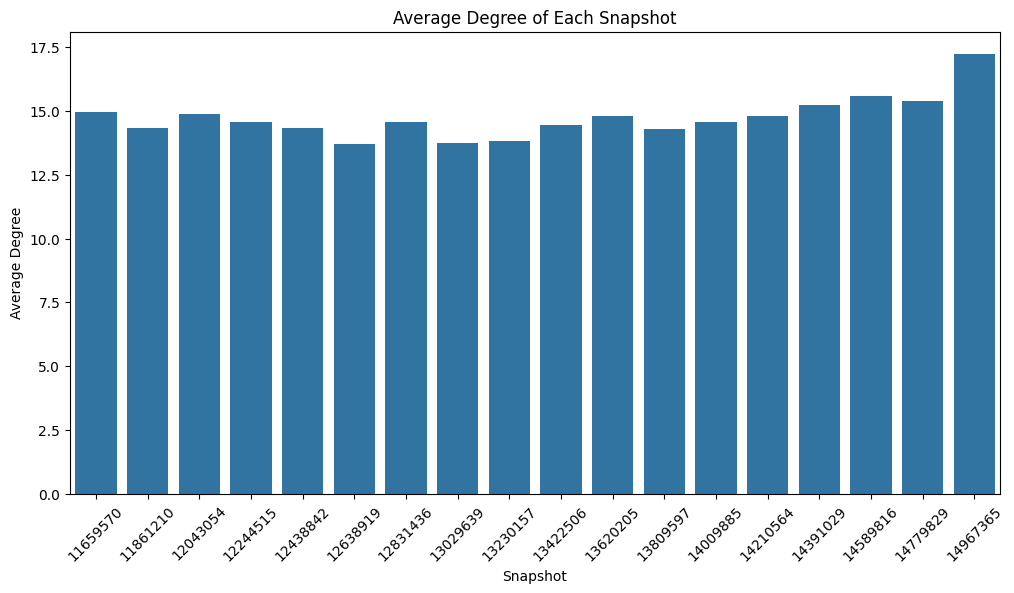

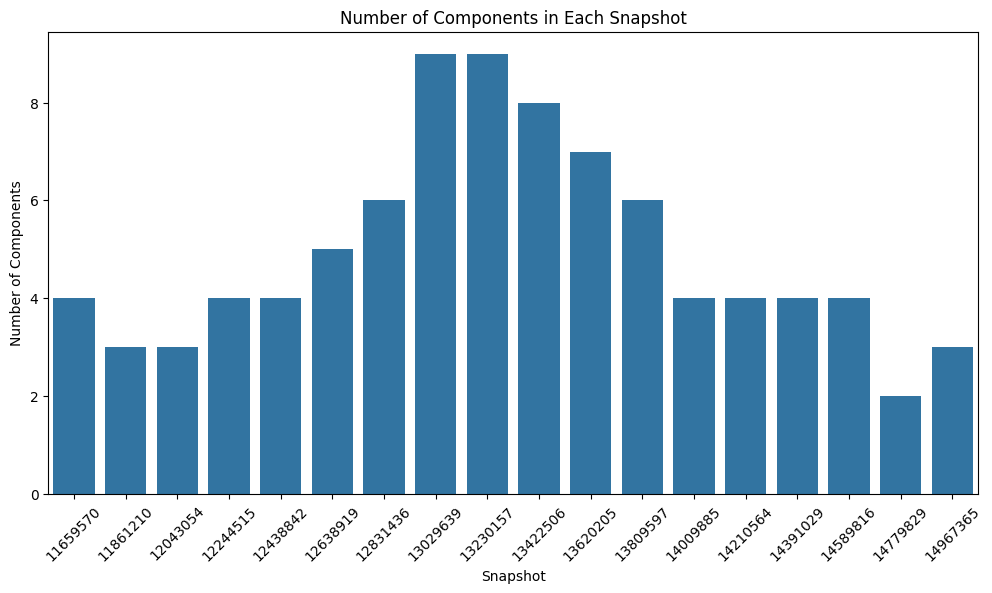

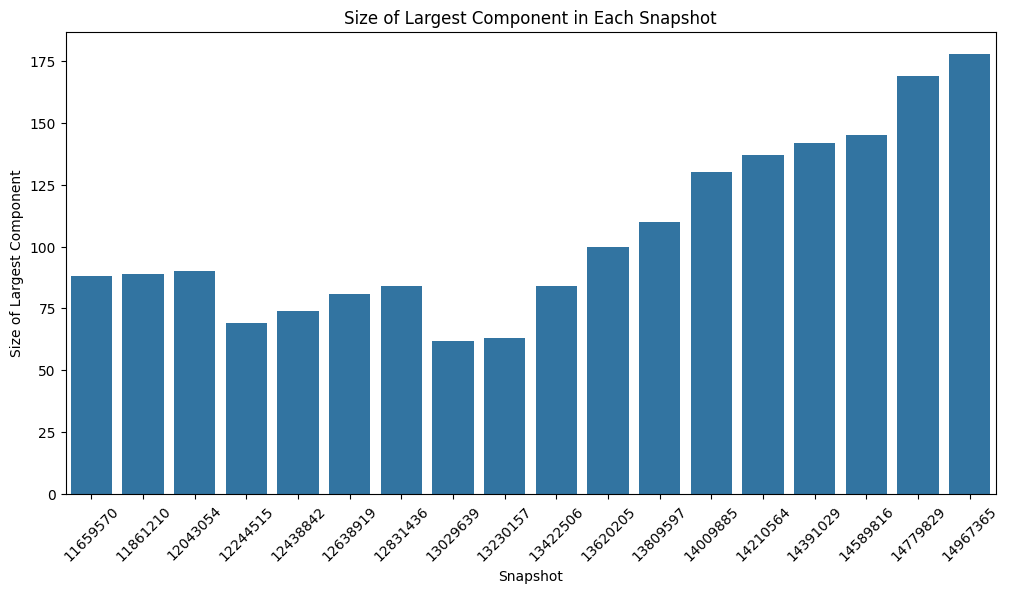

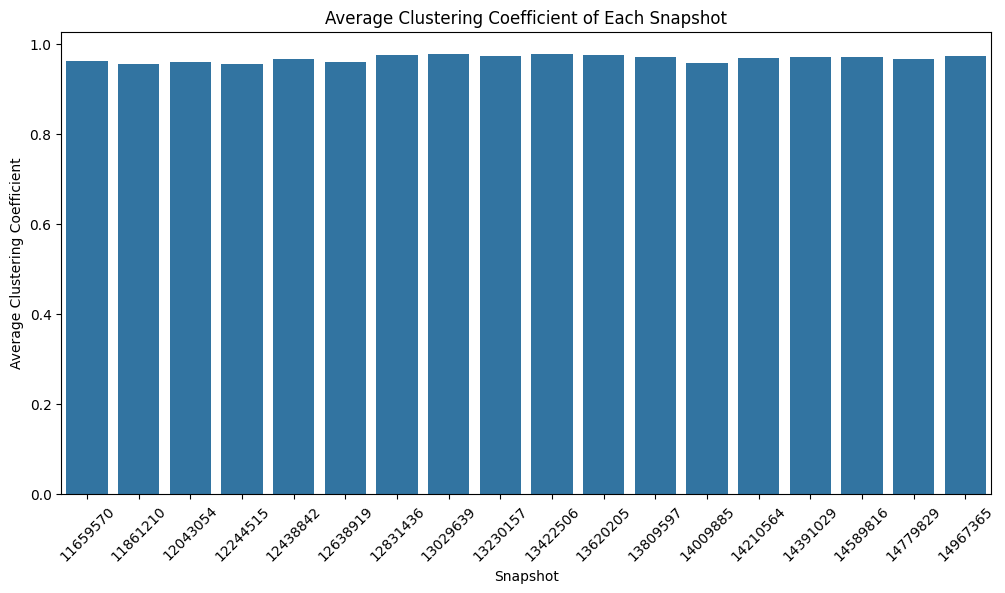

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting Nodes
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Nodes', data=graph_stats, color='b')
plt.title('Nodes in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Nodes')
plt.xticks(rotation=45)
plt.show()

# Plotting Edges
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Edges', data=graph_stats, color='r')
plt.title('Edges in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Edges')
plt.xticks(rotation=45)
plt.show()

# Plotting Density
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='Density', data=graph_stats)
plt.title('Density of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

# Plotting Average Degree
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='AvgDegree', data=graph_stats)
plt.title('Average Degree of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Average Degree')
plt.xticks(rotation=45)
plt.show()

# Plotting Number of Components
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='NumComponents', data=graph_stats)
plt.title('Number of Components in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Number of Components')
plt.xticks(rotation=45)
plt.show()

# Plotting Size of Largest Component
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='SizeLargestComponent', data=graph_stats)
plt.title('Size of Largest Component in Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Size of Largest Component')
plt.xticks(rotation=45)
plt.show()

# Plotting Average Clustering Coefficient
plt.figure(figsize=(12, 6))
sns.barplot(x='Snapshot', y='AvgClusteringCoeff', data=graph_stats)
plt.title('Average Clustering Coefficient of Each Snapshot')
plt.xlabel('Snapshot')
plt.ylabel('Average Clustering Coefficient')
plt.xticks(rotation=45)
plt.show()

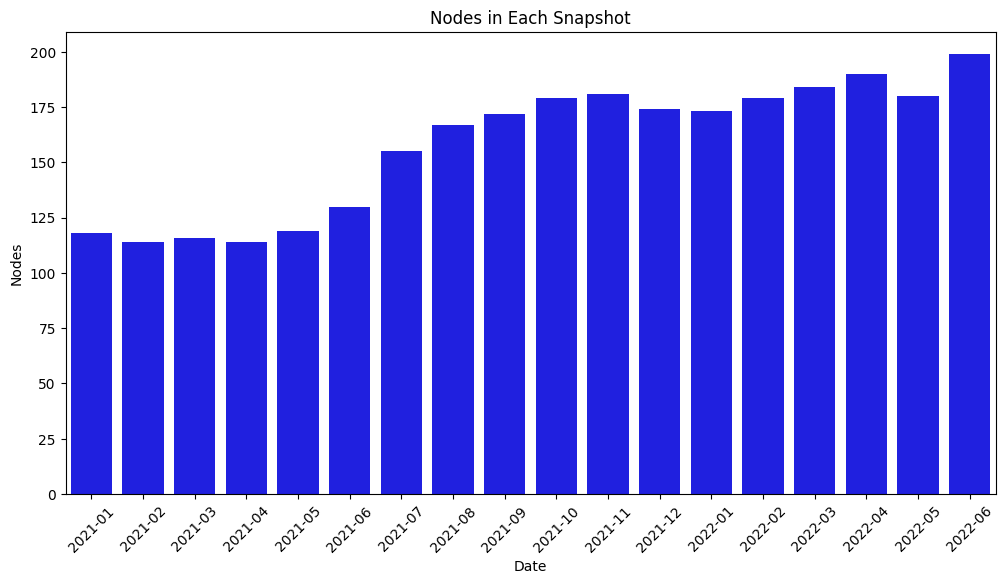

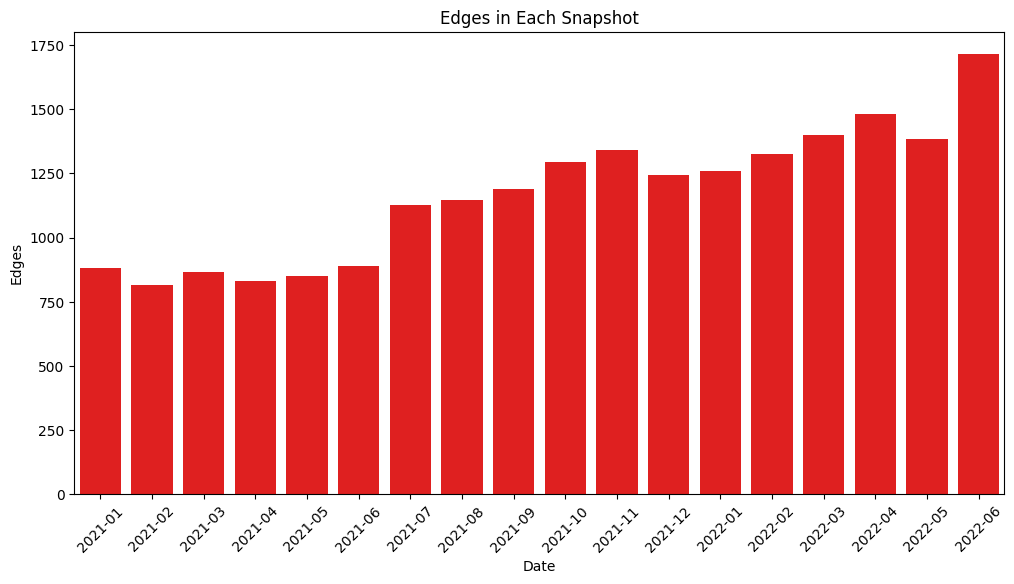

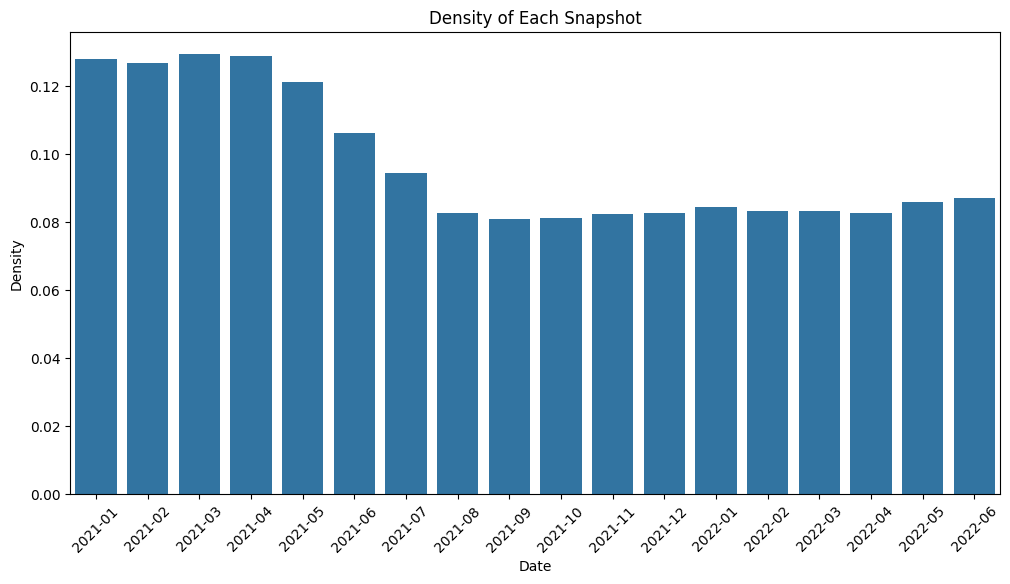

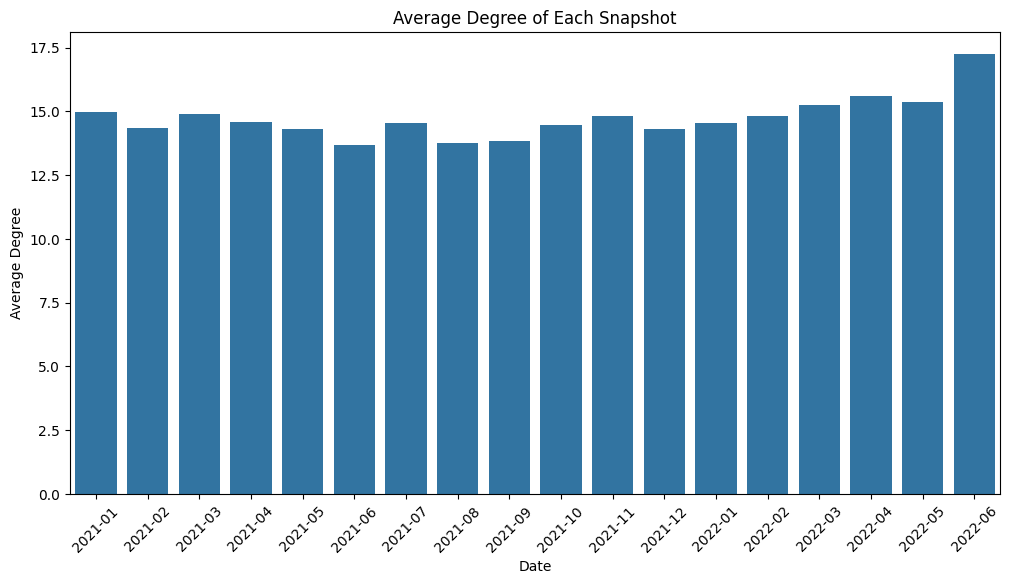

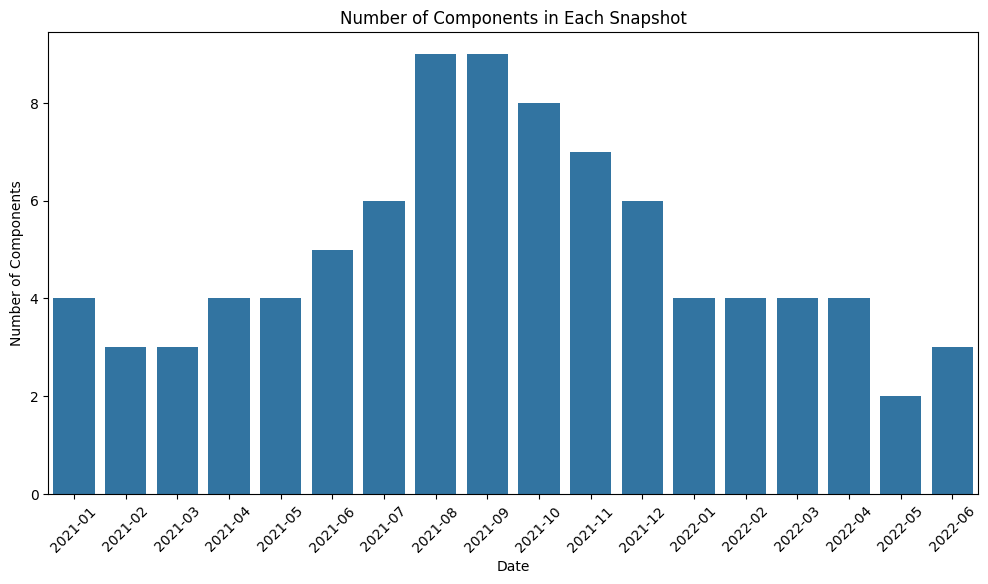

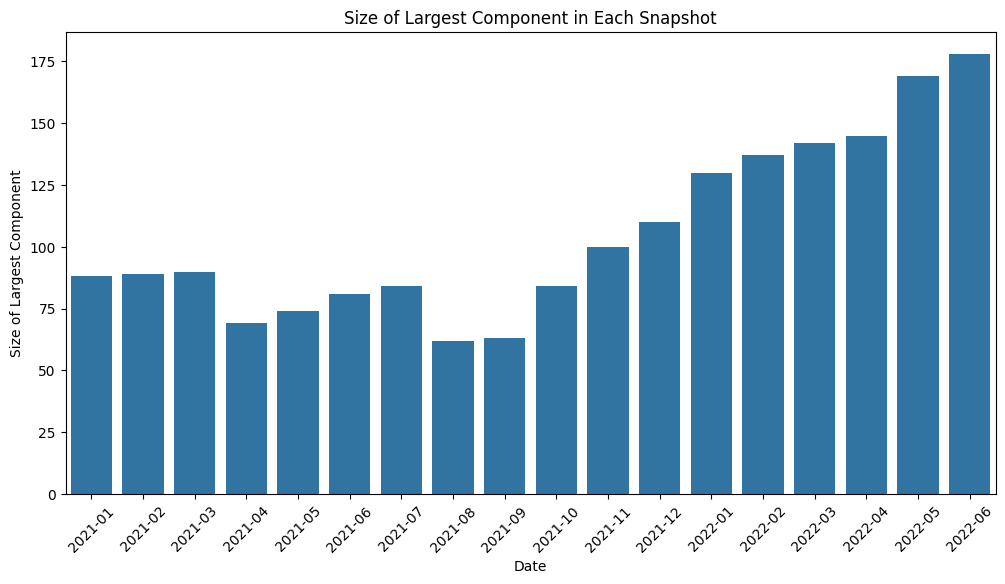

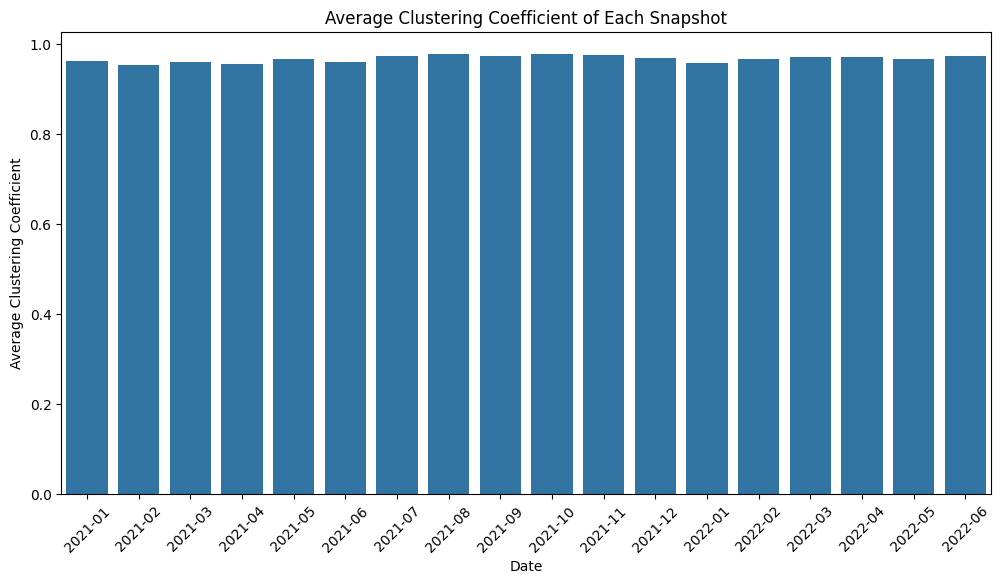

In [376]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping of snapshots to dates
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Date': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],
    }

    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        date = snapshot_dates.get(snapshot, 'Unknown')

        data['Snapshot'].append(snapshot)
        data['Date'].append(date)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    return pd.DataFrame(data)


graph_stats = calculate_graph_statistics(graphs)

# Plotting with Dates instead of Snapshot numbers
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Nodes', data=graph_stats, color='b')
plt.title('Nodes in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Nodes')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Edges', data=graph_stats, color='r')
plt.title('Edges in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Edges')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Density', data=graph_stats)
plt.title('Density of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='AvgDegree', data=graph_stats)
plt.title('Average Degree of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Average Degree')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='NumComponents', data=graph_stats)
plt.title('Number of Components in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Number of Components')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='SizeLargestComponent', data=graph_stats)
plt.title('Size of Largest Component in Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Size of Largest Component')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='AvgClusteringCoeff', data=graph_stats)
plt.title('Average Clustering Coefficient of Each Snapshot')
plt.xlabel('Date')
plt.ylabel('Average Clustering Coefficient')
plt.xticks(rotation=45)
plt.show()


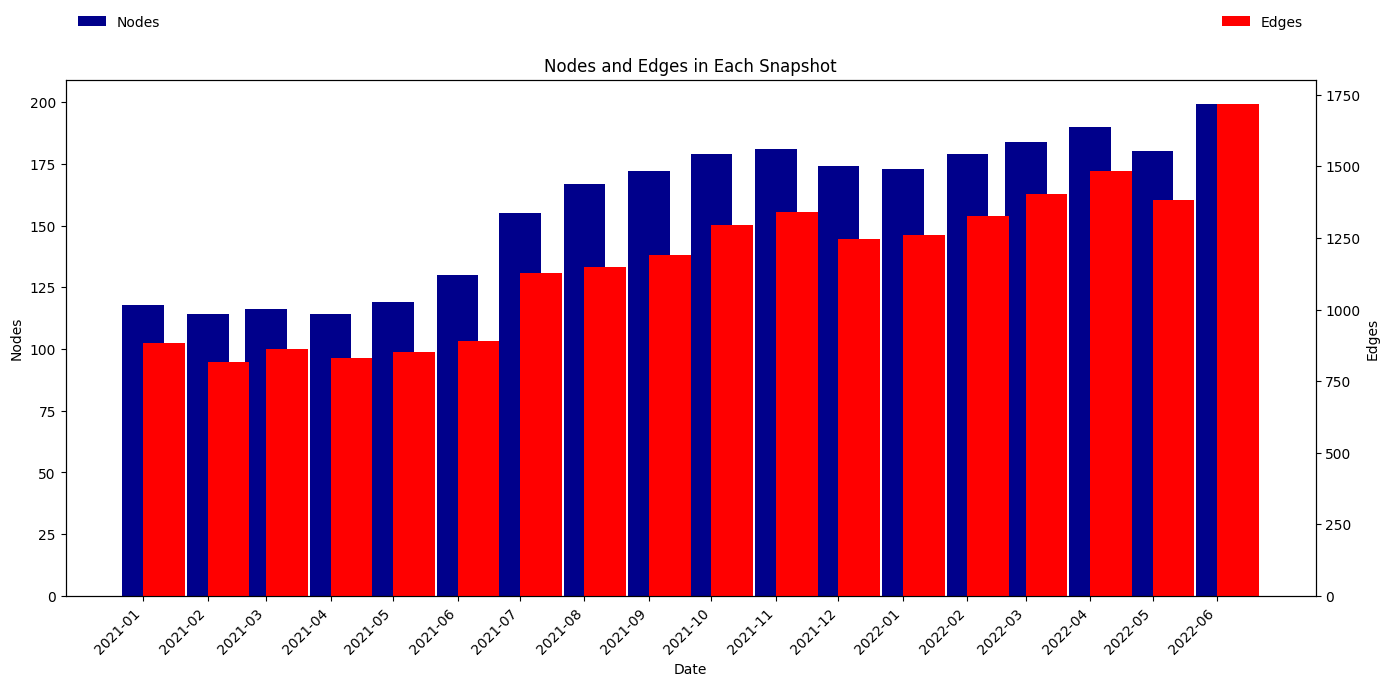

In [377]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Date': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],
    }

    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        date = snapshot_dates.get(snapshot, 'Unknown')

        data['Snapshot'].append(snapshot)
        data['Date'].append(date)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    return pd.DataFrame(data)

s
graph_stats = calculate_graph_statistics(graphs)

graph_stats['Date'] = pd.to_datetime(graph_stats['Date'])

# Plotting Nodes and Edges as Twin Bar Charts
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.bar(graph_stats['Date'], graph_stats['Nodes'], color='darkblue', width=20, align='center', label='Nodes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nodes', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for edges
ax2 = ax1.twinx()

ax2.bar(graph_stats['Date'], graph_stats['Edges'], color='red', width=20, align='edge', label='Edges')
ax2.set_ylabel('Edges', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticks(graph_stats['Date'])
ax1.set_xticklabels(graph_stats['Date'].dt.strftime('%Y-%m'), rotation=45, ha='right')

ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.15), frameon=False)

plt.title('Nodes and Edges in Each Snapshot')
plt.tight_layout()
plt.show()


In [380]:
graph_stats = calculate_graph_statistics(graphs)

import pandas as pd

print(graph_stats)


    Snapshot     Date  Nodes  Edges   Density  AvgDegree  NumComponents  \
0   11659570  2021-01    118    883  0.127915  14.966102              4   
1   11861210  2021-02    114    817  0.126844  14.333333              3   
2   12043054  2021-03    116    864  0.129535  14.896552              3   
3   12244515  2021-04    114    831  0.129017  14.578947              4   
4   12438842  2021-05    119    852  0.121350  14.319328              4   
5   12638919  2021-06    130    890  0.106142  13.692308              5   
6   12831436  2021-07    155   1128  0.094512  14.554839              6   
7   13029639  2021-08    167   1148  0.082822  13.748503              9   
8   13230157  2021-09    172   1189  0.080851  13.825581              9   
9   13422506  2021-10    179   1294  0.081225  14.458101              8   
10  13620205  2021-11    181   1341  0.082320  14.817680              7   
11  13809597  2021-12    174   1245  0.082719  14.310345              6   
12  14009885  2022-01    

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def calculate_graph_statistics(graphs_dict):
    data = {
        'Snapshot': [],
        'Nodes': [],
        'Edges': [],
        'Density': [],
        'AvgDegree': [],
        'NumComponents': [],
        'SizeLargestComponent': [],
        'AvgClusteringCoeff': [],
    }

    # Calculate graph statistics for each snapshot
    for snapshot, G in graphs_dict.items():
        num_nodes = len(G.nodes())
        num_edges = len(G.edges())
        density = nx.density(G)
        avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
        num_components = nx.number_connected_components(G)
        largest_component = max(nx.connected_components(G), key=len)
        size_largest_component = len(largest_component)
        avg_clustering = nx.average_clustering(G)
        
        # Append the statistics to the data dictionary
        data['Snapshot'].append(snapshot)
        data['Nodes'].append(num_nodes)
        data['Edges'].append(num_edges)
        data['Density'].append(density)
        data['AvgDegree'].append(avg_degree)
        data['NumComponents'].append(num_components)
        data['SizeLargestComponent'].append(size_largest_component)
        data['AvgClusteringCoeff'].append(avg_clustering)

    return pd.DataFrame(data)

# Example usage: Assuming `graphs` is a dictionary of NetworkX graphs
graph_stats = calculate_graph_statistics(graphs)

# Mapping snapshot IDs to dates
snapshot_dates = {
    '11659570': '2021-01', '11861210': '2021-02', '12043054': '2021-03', '12244515': '2021-04',
    '12438842': '2021-05', '12638919': '2021-06', '12831436': '2021-07', '13029639': '2021-08',
    '13230157': '2021-09', '13422506': '2021-10', '13620205': '2021-11', '13809597': '2021-12',
    '14009885': '2022-01', '14210564': '2022-02', '14391029': '2022-03', '14589816': '2022-04',
    '14779829': '2022-05', '14967365': '2022-06'
}

# Convert Snapshot IDs to dates
graph_stats['Date'] = graph_stats['Snapshot'].map(snapshot_dates)

# Convert the Date column to datetime format and sort by Date
graph_stats['Date'] = pd.to_datetime(graph_stats['Date'])
graph_stats = graph_stats.sort_values('Date')

# Plotting Nodes and Edges Over Time with Two Different Y-Axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Nodes as bars
ax1.bar(graph_stats['Date'], graph_stats['Nodes'], color='b', alpha=0.6, label='Nodes')
ax1.set_xlabel('Date')
ax1.set_ylabel('Nodes', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a twin axis for Edges
ax2 = ax1.twinx()
ax2.plot(graph_stats['Date'], graph_stats['Edges'], color='r', marker='o', label='Edges')
ax2.set_ylabel('Edges', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Nodes and Edges Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Generating normal graph

In [ ]:
import os
from os.path import join
from dotenv import load_dotenv
import dask.dataframe as dd
from tqdm import tqdm
import pandas as pd
import time
import numpy as np
import networkx as nx

from src.wallet_projection.wallet_projection_analysis import validate_wallet_links  # Adjust the import if necessary

load_dotenv()

path = os.environ['DATA_DIRECTORY']

# Constants
SNAPSHOT_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv'
ADDRESS_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
OUTPUT_PATH = join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs')
SUPPLY_THRESHOLD = 0.01 # 0.01  equal 1% of token supply

KNOWN_BURNER_ADDRESSES = set([
    '0x0000000000000000000000000000000000000000', '0x000000000000000000000000000000000000dead',
    '0x0000000000000000000000000000000000000001', '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003', '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005', '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007'
])

def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    dtypes = {
        'label': 'object',  # Specify dtype for the label column
        # Add other columns with their expected dtypes if necessary
    }
    
    ddf = dd.read_csv(
        join(path, f'/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_token_balance_tables/token_holder_snapshot_balance_labelled_{snapshot}.csv'),
        dtype=dtypes
    )   
    
    # Efficient filtering using Dask
    ddf = ddf[(ddf['value'] > 0) & 
              (ddf.pct_supply > SUPPLY_THRESHOLD) &
              (~ddf['address'].isin(KNOWN_BURNER_ADDRESSES)) & 
              (ddf['token_address'].isin(df_addresses['address']))]

    present_addresses = ddf['address'].unique().compute()
    pop_size = len(ddf['token_address'].unique().compute())

    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf.compute(), pop_size)

    G = nx.Graph()
    G.add_edges_from(validated_links['combination'])

    nx.write_graphml(G, join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml'))

    end_time = time.time()
    time_taken = end_time - start_time
    return snapshot, time_taken

# Main function to load, process data, and generate network graphs
def generate_network_graphs():
    df_snapshot = pd.read_csv(SNAPSHOT_CSV_PATH)
    df_addresses = pd.read_csv(ADDRESS_CSV_PATH)

    snapshots = df_snapshot[df_snapshot['Block Height'] >= 11659570]['Block Height']

    total_snapshots = len(snapshots)
    total_time = 0

    with tqdm(total=total_snapshots) as pbar:
        for snapshot in snapshots:
            snapshot, time_taken = process_snapshot(snapshot, df_addresses)
            total_time += time_taken
            avg_time_per_snapshot = total_time / (pbar.n + 1)
            estimated_total_time = avg_time_per_snapshot * total_snapshots
            remaining_time = estimated_total_time - total_time
            pbar.set_postfix({
                'Snapshot': snapshot,
                'Time per snapshot': f'{avg_time_per_snapshot:.2f}s',
                'Remaining time': f'{remaining_time:.2f}s'
            })
            pbar.update(1)

if __name__ == "__main__":
    generate_network_graphs()

# Generating enriched graph

In [ ]:
import os
import pandas as pd
import dask.dataframe as dd
import networkx as nx
from tqdm import tqdm
import time
from os.path import join
from dotenv import load_dotenv

from src.wallet_projection.wallet_projection_analysis import validate_wallet_links  # Adjust the import if necessary

def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    dtypes = {
        'label': 'object',  # Specify dtype for the label column if used
        'value': 'float64',
        'pct_supply': 'float64',
        'address': 'object',
        'token_address': 'object'
    }
    
    # Load snapshot data
    ddf = dd.read_csv(
        join(path, f'/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_token_balance_tables_enriched/token_holder_snapshot_balance_labelled_{snapshot}.csv'),
        dtype=dtypes
    )
    
    # Filter out unwanted addresses and low balances
    ddf_filtered = ddf[(ddf['value'] > 0) & 
                       (ddf.pct_supply > SUPPLY_THRESHOLD) &
                       (~ddf['address'].isin(known_burner_addresses)) & 
                       (ddf['token_address'].isin(df_addresses['address']))]

    # Compute unique addresses and their corresponding tokens
    present_addresses = ddf_filtered['address'].compute()
    address_to_token = ddf_filtered[['address', 'token_address']].drop_duplicates().compute().set_index('address')['token_address'].to_dict()

    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf_filtered.compute(), len(present_addresses))

    G = nx.Graph()
    
    # Add nodes with token information
    for address in present_addresses:
        G.add_node(address, token_address=address_to_token.get(address, 'Unknown'))
    
    # Add validated links as edges
    G.add_edges_from(validated_links['combination'])

    # Store the graph with additional token information
    nx.write_graphml(G, join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml'))

    end_time = time.time()
    time_taken = end_time - start_time
    return snapshot, time_taken

if __name__ == "__main__":
    load_dotenv()
    
   
# Constants
SNAPSHOT_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv'
ADDRESS_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
OUTPUT_PATH = join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched')
SUPPLY_THRESHOLD = 0.01 # 0.01  equal 1% of token supply


os.makedirs(OUTPUT_PATH, exist_ok=True)  # Ensure the output directory exists
    
df_snapshot = pd.read_csv(SNAPSHOT_CSV_PATH)
df_addresses = pd.read_csv(ADDRESS_CSV_PATH)
snapshots = df_snapshot[df_snapshot['Block Height'] >= 11659570]['Block Height']
total_snapshots = len(snapshots)
total_time = 0

with tqdm(total=total_snapshots) as pbar:
    for snapshot in snapshots:
            snapshot, time_taken = process_snapshot(snapshot, df_addresses)
            total_time += time_taken
            avg_time_per_snapshot = total_time / (pbar.n + 1)
            estimated_total_time = avg_time_per_snapshot * total_snapshots
            remaining_time = estimated_total_time - total_time
            pbar.set_postfix({
                'Snapshot': snapshot,
                'Time per snapshot': f'{avg_time_per_snapshot:.2f}s',
                'Remaining time': f'{remaining_time:.2f}s'
            })
            pbar.update(1)


# Checking basic graph properties

#### Normal graph

In [325]:
import networkx as nx

graphml_file_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11659570.graphml'

G = nx.read_graphml(graphml_file_path)

def inspect_graph(G):
    # Print basic graph information
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Graph is directed: {G.is_directed()}\n")

    print("Sample of node attributes (first 5 nodes):")
    for node, attrs in list(G.nodes(data=True))[:5]:
        print(f"Node: {node}")
        for attr_name, attr_value in attrs.items():
            print(f"  - {attr_name}: {attr_value}")
        print()

    print("Sample of edge attributes (first 5 edges):")
    for edge in list(G.edges(data=True))[:5]:
        print(f"Edge: {edge}")
        for attr_name, attr_value in edge[2].items():
            print(f"  - {attr_name}: {attr_value}")
        print()

    # Print all node and edge attributes
    node_attr_keys = set().union(*(d.keys() for n, d in G.nodes(data=True)))
    edge_attr_keys = set().union(*(d.keys() for u, v, d in G.edges(data=True)))

    print(f"Node attributes: {node_attr_keys}")
    print(f"Edge attributes: {edge_attr_keys}")

inspect_graph(G)



Number of nodes: 118
Number of edges: 883
Graph is directed: False

Sample of node attributes (first 5 nodes):
Node: 0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d

Node: 0xd6868b23905009d859cc232f7c008c13bc527702

Node: 0x2775b1c75658be0f640272ccb8c72ac986009e38

Node: 0xc22fbdc5dc1fd8a43b0e1e655202014c00342eb7

Node: 0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10

Sample of edge attributes (first 5 edges):
Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0xd6868b23905009d859cc232f7c008c13bc527702', {})

Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10', {})

Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0xca8d6f69d8f32516a109df68b623452cc9f5e64d', {})

Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0xc2adda861f89bbb333c90c492cb837741916a225', {})

Edge: ('0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d', '0x9ef05f7f6deb616fd37ac3c959a2ddd25a54e4f5', {})

Node attributes: set()
Edge attributes: set()


#### Enriched graph

In [326]:
import networkx as nx

graphml_file_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_11659570.graphml'

G = nx.read_graphml(graphml_file_path)

def inspect_graph(G):
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")
    print(f"Graph is directed: {G.is_directed()}\n")

    print("Sample of node attributes (first 5 nodes):")
    for node, attrs in list(G.nodes(data=True))[:5]:
        print(f"Node: {node}")
        for attr_name, attr_value in attrs.items():
            print(f"  - {attr_name}: {attr_value}")
        print()

    print("Sample of edge attributes (first 5 edges):")
    for edge in list(G.edges(data=True))[:5]:
        print(f"Edge: {edge}")
        for attr_name, attr_value in edge[2].items():
            print(f"  - {attr_name}: {attr_value}")
        print()

    node_attr_keys = set().union(*(d.keys() for n, d in G.nodes(data=True)))
    edge_attr_keys = set().union(*(d.keys() for u, v, d in G.edges(data=True)))

    print(f"Node attributes: {node_attr_keys}")
    print(f"Edge attributes: {edge_attr_keys}")

inspect_graph(G)


Number of nodes: 118
Number of edges: 888
Graph is directed: False

Sample of node attributes (first 5 nodes):
Node: 0x000be27f560fef0253cac4da8411611184356549
  - token_address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2

Node: 0x0248374df0bf742386a278430cdf2cf8a95d6dd9
  - token_address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2

Node: 0x05e793ce0c6027323ac150f6d45c2344d28b6019
  - token_address: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2

Node: 0x088ee5007c98a9677165d78dd2109ae4a3d04d0c
  - token_address: 0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e

Node: 0x090d4613473dee047c3f2706764f49e0821d256e
  - token_address: 0x1f9840a85d5af5bf1d1762f925bdaddc4201f984

Sample of edge attributes (first 5 edges):
Edge: ('0x000be27f560fef0253cac4da8411611184356549', '0x0a3f6849f78076aefadf113f5bed87720274ddc0', {})

Edge: ('0x000be27f560fef0253cac4da8411611184356549', '0x0248374df0bf742386a278430cdf2cf8a95d6dd9', {})

Edge: ('0x000be27f560fef0253cac4da8411611184356549', '0x05e793ce0c6027323ac150

In [327]:
import networkx as nx
from dotenv import load_dotenv

load_dotenv()

input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  
        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
    
    return graphs, dates

data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")

Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

# Aligning the token labeling


In [328]:
import os
import networkx as nx
from os.path import join

normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Load specific snapshot for comparison
snapshot = '11659570'  # Example snapshot number
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

normal_nodes = set(normal_graph.nodes())
enriched_nodes = set(enriched_graph.nodes())

matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

Total nodes in normal graph: 118
Total nodes in enriched graph: 118
Matched nodes: 118
Unmatched nodes: 0


In [329]:
import os
import networkx as nx
import pandas as pd
from os.path import join

normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

snapshot = '11659570'  
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

for node in normal_graph.nodes():
    if 'token_address' in enriched_graph.nodes[node]:
        token_address = enriched_graph.nodes[node]['token_address'].lower()
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name
    else:
        normal_graph.nodes[node]['token_name'] = 'Unknown Token'

token_names = nx.get_node_attributes(normal_graph, 'token_name')
print("Token names associated with nodes:")
for node, token_name in token_names.items():
    print(f"Node: {node}, Token: {token_name}")

Token names associated with nodes:
Node: 0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d, Token: Maker
Node: 0xd6868b23905009d859cc232f7c008c13bc527702, Token: Maker
Node: 0x2775b1c75658be0f640272ccb8c72ac986009e38, Token: Compound
Node: 0xc22fbdc5dc1fd8a43b0e1e655202014c00342eb7, Token: Compound
Node: 0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10, Token: Maker
Node: 0x7587caefc8096f5f40acb83a09df031a018c66ec, Token: Compound
Node: 0xf584f8728b874a6a5c7a8d4d387c9aae9172d621, Token: Compound
Node: 0xca8d6f69d8f32516a109df68b623452cc9f5e64d, Token: Maker
Node: 0xc2adda861f89bbb333c90c492cb837741916a225, Token: Maker
Node: 0x6cc5f688a315f3dc28a7781717a9a798a59fda7b, Token: Sushi
Node: 0x795065dcc9f64b5614c407a6efdc400da6221fb0, Token: Sushi
Node: 0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3, Token: Compound
Node: 0x9ef05f7f6deb616fd37ac3c959a2ddd25a54e4f5, Token: Maker
Node: 0x7b5cc9cea37f66f8e21a4c393234a84e458a8d2d, Token: Compound
Node: 0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3, Token: Maker
No

In [330]:
import os
import networkx as nx
from os.path import join
import pandas as pd

normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

df_tokens = pd.read_csv(token_info_path)
df_tokens['address'] = df_tokens['address'].str.lower() 
token_map = df_tokens.set_index('address')['name'].to_dict()

snapshot = '14210564'  
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph.nodes():
        token_address = enriched_graph.nodes[normalized_node].get('token_address', '').lower()
        
        if token_address in token_map:
            token_info[node] = token_map[token_address]
        else:
            print(f"Token address not found in token_map: {token_address}")
            token_info[node] = 'Unknown Token'
    else:
        print(f"Node {normalized_node} not found in enriched graph.")
        token_info[node] = 'Unknown Token'

print("\nSample of matched nodes and their tokens:")
for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Total nodes in normal graph: 179
Total nodes in enriched graph: 179
Matched nodes: 179
Unmatched nodes: 0

Sample of matched nodes and their tokens:
Node: 0x61c808d82a3ac53231750dadc13c777b59310bd9, Token: Lido
Node: 0xc24da173a250e9ca5c54870639ebe5f88be5102d, Token: Lido
Node: 0x7a2e4aa4f2f6ab66594fff84dcabac67fb9773c8, Token: Balancer
Node: 0xb129f73f1afd3a49c701241f374db17ae63b20eb, Token: Balancer
Node: 0x7d64f03a7a15e6082d1371c82c59770d73b4f8aa, Token: Balancer
Node: 0xa3a7b6f88361f48403514059f1f16c8e78d60eec, Token: Balancer
Node: 0x583f6878eccbcf41d5126938647dc74fcce34e31, Token: Instadapp
Node: 0xba540205a5bb53e648e994be815a3a55d8367da2, Token: Instadapp
Node: 0xb1dc62ec38e6e3857a887210c38418e4a17da5b2, Token: Instadapp
Node: 0x02c2e03c5f241794909d953f5b8fa630856f172c, Token: Bitdao


In [331]:
import os
import networkx as nx
from os.path import join

normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

snapshot = '13230157'  
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_with_tokens_{snapshot}.graphml')

normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph:
        token_info[node] = enriched_graph.nodes[normalized_node].get('token_name', 'Unknown Token')
    else:
        token_info[node] = 'Unknown Token'

for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Total nodes in normal graph: 172
Total nodes in enriched graph: 172
Matched nodes: 172
Unmatched nodes: 0
Node: 0x2a7d59e327759acd5d11a8fb652bf4072d28ac04, Token: Curve
Node: 0xb1cff81b9305166ff1efc49a129ad2afcd7bcf19, Token: Curve
Node: 0x08a90fe0741b7def03fb290cc7b273f1855767d8, Token: Dydx
Node: 0xf95746b2c3d120b78fd1cb3f9954cb451c2163e4, Token: Dydx
Node: 0x0ec9e8aa56e0425b60dee347c8efbad959579d0f, Token: Uniswap
Node: 0x4b4e140d1f131fdad6fb59c13af796fd194e4135, Token: Uniswap
Node: 0x5f3b5dfeb7b28cdbd7faba78963ee202a494e2a2, Token: Curve
Node: 0x679fcb9b33fc4ae10ff4f96caef49c1ae3f8fa67, Token: Curve
Node: 0x25f2226b597e8f9514b3f68f00f494cf4f286491, Token: Aave
Node: 0xffc97d72e13e01096502cb8eb52dee56f74dad7b, Token: Aave


In [332]:
unknown_tokens = {node: token for node, token in token_info.items() if token == 'Unknown Token'}

# Print the number of nodes with 'Unknown Token'
print(f"Number of nodes with 'Unknown Token': {len(unknown_tokens)}")

if unknown_tokens:
    print("Sample of nodes with 'Unknown Token':")
    for node, token in list(unknown_tokens.items())[:10]:
        print(f"Node: {node}, Token: {token}")


Number of nodes with 'Unknown Token': 0


In [333]:
import os
import networkx as nx
from os.path import join

normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

snapshot = '14589816'  
normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_with_tokens_{snapshot}.graphml')

normal_graph = nx.read_graphml(normal_graph_file)
enriched_graph = nx.read_graphml(enriched_graph_file)

normal_nodes = {node.lower() for node in normal_graph.nodes()}
enriched_nodes = {node.lower() for node in enriched_graph.nodes()}

print("Sample node attributes from the enriched graph:")
for node in list(enriched_graph.nodes())[:10]:  # Print attributes for the first 10 nodes
    print(f"Node: {node}, Attributes: {enriched_graph.nodes[node]}")

matched_nodes = normal_nodes & enriched_nodes
unmatched_nodes = normal_nodes - enriched_nodes

print(f"Total nodes in normal graph: {len(normal_nodes)}")
print(f"Total nodes in enriched graph: {len(enriched_nodes)}")
print(f"Matched nodes: {len(matched_nodes)}")
print(f"Unmatched nodes: {len(unmatched_nodes)}")

if unmatched_nodes:
    print("Examples of unmatched nodes:", list(unmatched_nodes)[:10])

token_info = {}
for node in normal_graph.nodes():
    normalized_node = node.lower()
    if normalized_node in enriched_graph.nodes():
        token_info[node] = enriched_graph.nodes[normalized_node].get('token_name', 'Unknown Token')
    else:
        token_info[node] = 'Unknown Token'

for node, token in list(token_info.items())[:10]:
    print(f"Node: {node}, Token: {token}")


Sample node attributes from the enriched graph:
Node: 0x69076e44a9c70a67d5b79d95795aba299083c275, Attributes: {'token_name': 'Maker'}
Node: 0xca8d6f69d8f32516a109df68b623452cc9f5e64d, Attributes: {'token_name': 'Maker'}
Node: 0x4048c47b546b68ad226ea20b5f0acac49b086a21, Attributes: {'token_name': 'Aave'}
Node: 0xc697051d1c6296c24ae3bcef39aca743861d9a81, Attributes: {'token_name': 'Aave'}
Node: 0xc713e5e149d5d0715dcd1c156a020976e7e56b88, Attributes: {'token_name': 'Maker'}
Node: 0x9849c2c1b73b41aee843a002c332a2d16aaab611, Attributes: {'token_name': 'Lido'}
Node: 0xa2dfc431297aee387c05beef507e5335e684fbcd, Attributes: {'token_name': 'Lido'}
Node: 0xb1dc62ec38e6e3857a887210c38418e4a17da5b2, Attributes: {'token_name': 'Instadapp'}
Node: 0xe48cd70f7072fd0c21a3b2c323efabe7ed223e02, Attributes: {'token_name': 'Instadapp'}
Node: 0x11577a8a5baf1e25b9a2d89f39670f447d75c3cd, Attributes: {'token_name': 'Maker'}
Total nodes in normal graph: 190
Total nodes in enriched graph: 190
Matched nodes: 190
U

In [334]:
import os
import networkx as nx
import pandas as pd
from os.path import join

normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

df_tokens = pd.read_csv(token_info_path)
token_map = df_tokens.set_index('address')['name'].to_dict()

snapshots = sorted([f.split('_')[-1].replace('.graphml', '') for f in os.listdir(normal_graph_path) if f.endswith('.graphml')])

for snapshot in snapshots:
    print(f"\nProcessing snapshot {snapshot}...")

    normal_graph_file = join(normal_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')
    enriched_graph_file = join(enriched_graph_path, f'validated_wallet_projection_graph_{snapshot}.graphml')

    normal_graph = nx.read_graphml(normal_graph_file)
    enriched_graph = nx.read_graphml(enriched_graph_file)

    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())
    unmatched_nodes = set(normal_graph.nodes()) - set(enriched_graph.nodes())

    known_tokens_count = 0
    unknown_tokens_count = 0

    print(f"Total nodes in normal graph: {len(normal_graph.nodes())}")
    print(f"Total nodes in enriched graph: {len(enriched_graph.nodes())}")
    print(f"Matched nodes: {len(matched_nodes)}")
    print(f"Unmatched nodes: {len(unmatched_nodes)}")

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')

        if token_name == 'Unknown Token':
            unknown_tokens_count += 1
        else:
            known_tokens_count += 1

        if known_tokens_count + unknown_tokens_count <= 10:  
            print(f"Node: {node}, Token Address: {token_address}, Token Name: {token_name}")

    print(f"Known tokens in snapshot {snapshot}: {known_tokens_count}")
    print(f"Unknown tokens in snapshot {snapshot}: {unknown_tokens_count}")


Processing snapshot 11659570...
Total nodes in normal graph: 118
Total nodes in enriched graph: 118
Matched nodes: 118
Unmatched nodes: 0
Node: 0x6d19b2bf3a36a61530909ae65445a906d98a2fa8, Token Address: 0xba100000625a3754423978a60c9317c58a424e3d, Token Name: Balancer
Node: 0x9f41cecc435101045ea9f41d4ee8c5353f77e5d5, Token Address: 0x1f9840a85d5af5bf1d1762f925bdaddc4201f984, Token Name: Uniswap
Node: 0x5608169973d639649196a84ee4085a708bcbf397, Token Address: 0xc00e94cb662c3520282e6f5717214004a7f26888, Token Name: Compound
Node: 0xe3997288987e6297ad550a69b31439504f513267, Token Address: 0xd533a949740bb3306d119cc777fa900ba034cd52, Token Name: Curve
Node: 0xf584f8728b874a6a5c7a8d4d387c9aae9172d621, Token Address: 0xc00e94cb662c3520282e6f5717214004a7f26888, Token Name: Compound
Node: 0x8b1674a617f103897fb82ec6b8eb749ba0b9765b, Token Address: 0x5a98fcbea516cf06857215779fd812ca3bef1b32, Token Name: Lido
Node: 0x0f89d54b02ca570de82f770d33c7b7cf7b3c3394, Token Address: 0x5a98fcbea516cf06857215

In [335]:
import os
import pandas as pd
import networkx as nx
from os.path import join

enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

df_tokens = pd.read_csv(token_info_path)
token_map = df_tokens.set_index('address')['name'].to_dict()

def check_token_mapping():
    all_token_addresses = set()
    unmatched_token_addresses = set()

    for filename in os.listdir(enriched_graph_path):
        if filename.endswith('.graphml'):
            graph_file = join(enriched_graph_path, filename)
            graph = nx.read_graphml(graph_file)
            
            for node in graph.nodes():
                token_address = graph.nodes[node].get('token_address', None)
                if token_address:
                    all_token_addresses.add(token_address)
                    if token_address not in token_map:
                        unmatched_token_addresses.add(token_address)
    
    print(f"Total unique token addresses in enriched graphs: {len(all_token_addresses)}")
    print(f"Total unmatched token addresses: {len(unmatched_token_addresses)}")
    
    if unmatched_token_addresses:
        print("\nUnmatched token addresses:")
        for address in unmatched_token_addresses:
            print(address)
    else:
        print("All token addresses are matched correctly.")

check_token_mapping()



Total unique token addresses in enriched graphs: 15
Total unmatched token addresses: 0
All token addresses are matched correctly.


In [336]:
import os
import networkx as nx
import pandas as pd
from os.path import join

enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'  

df_tokens = pd.read_csv(token_info_path)
df_tokens['address'] = df_tokens['address'].str.lower()  
token_map = df_tokens.set_index('address')['name'].to_dict()

# Function to check for unmatched token addresses
def check_unmatched_token_addresses(enriched_graph_path, token_map):
    unmatched_addresses = set()
    
    # Iterate over all enriched graph files in the directory
    for filename in sorted(os.listdir(enriched_graph_path)):
        if filename.endswith('.graphml'):
            graph_path = join(enriched_graph_path, filename)
            G = nx.read_graphml(graph_path)

            for node, data in G.nodes(data=True):
                token_address = data.get('token_address', '').lower()
                
                if token_address and token_address not in token_map:
                    unmatched_addresses.add(token_address)

    return unmatched_addresses

unmatched_addresses = check_unmatched_token_addresses(enriched_graph_path, token_map)

if unmatched_addresses:
    print(f"Unmatched token addresses found: {len(unmatched_addresses)}")
    print("Examples of unmatched token addresses:", list(unmatched_addresses)[:10])
else:
    print("All token addresses are matched successfully.")


All token addresses are matched successfully.


# Checking address labelling

In [337]:
import networkx as nx

graph_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_11659570.graphml'
G = nx.read_graphml(graph_file)

def check_node_labels_are_wallet_addresses(G):
    for node in G.nodes():
        if not isinstance(node, str) or not node.startswith('0x'):
            print(f"Warning: Node label '{node}' does not look like a wallet address!")
        else:
            print(f"Node '{node}' is correctly labeled as a wallet address.")

check_node_labels_are_wallet_addresses(G)


Node '0x41527cc7cc6e63d9d0753d6fdbd4ac16096a029d' is correctly labeled as a wallet address.
Node '0xd6868b23905009d859cc232f7c008c13bc527702' is correctly labeled as a wallet address.
Node '0x2775b1c75658be0f640272ccb8c72ac986009e38' is correctly labeled as a wallet address.
Node '0xc22fbdc5dc1fd8a43b0e1e655202014c00342eb7' is correctly labeled as a wallet address.
Node '0xd0ed69e40a5b044d59411cf6ddc653c8c3924d10' is correctly labeled as a wallet address.
Node '0x7587caefc8096f5f40acb83a09df031a018c66ec' is correctly labeled as a wallet address.
Node '0xf584f8728b874a6a5c7a8d4d387c9aae9172d621' is correctly labeled as a wallet address.
Node '0xca8d6f69d8f32516a109df68b623452cc9f5e64d' is correctly labeled as a wallet address.
Node '0xc2adda861f89bbb333c90c492cb837741916a225' is correctly labeled as a wallet address.
Node '0x6cc5f688a315f3dc28a7781717a9a798a59fda7b' is correctly labeled as a wallet address.
Node '0x795065dcc9f64b5614c407a6efdc400da6221fb0' is correctly labeled as a wall

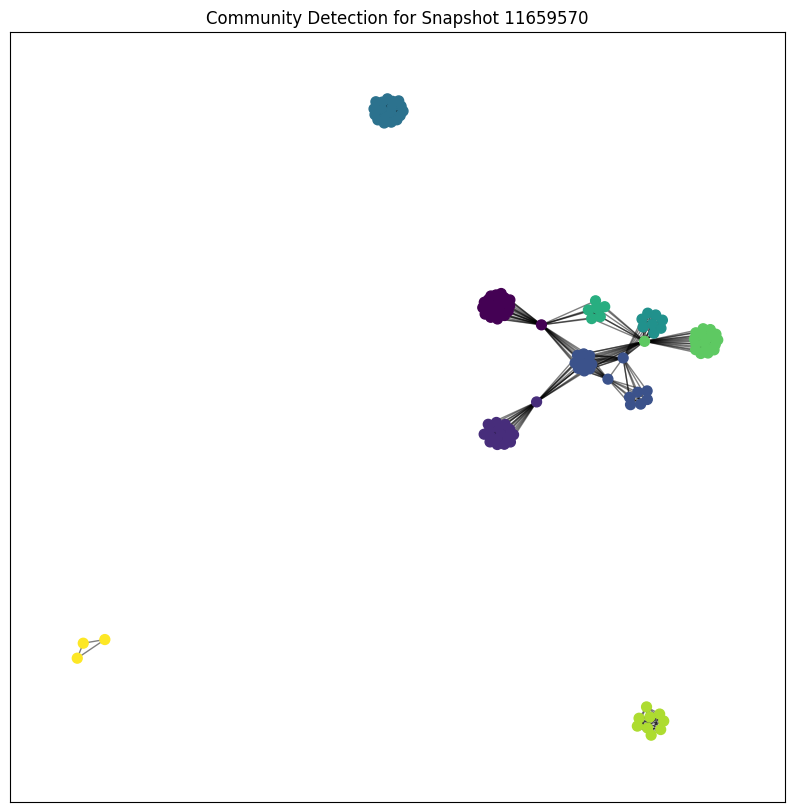

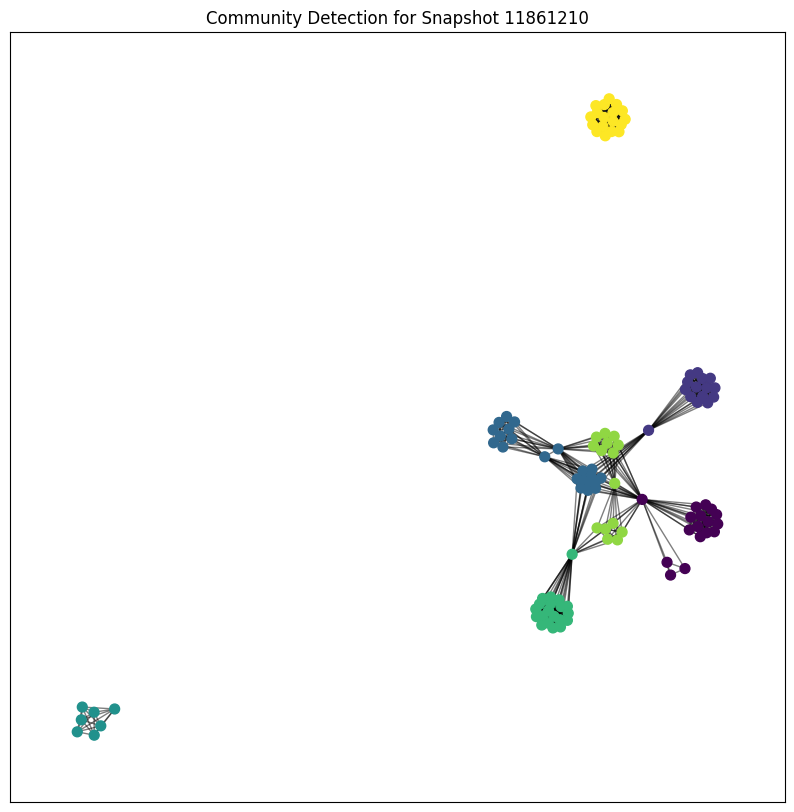

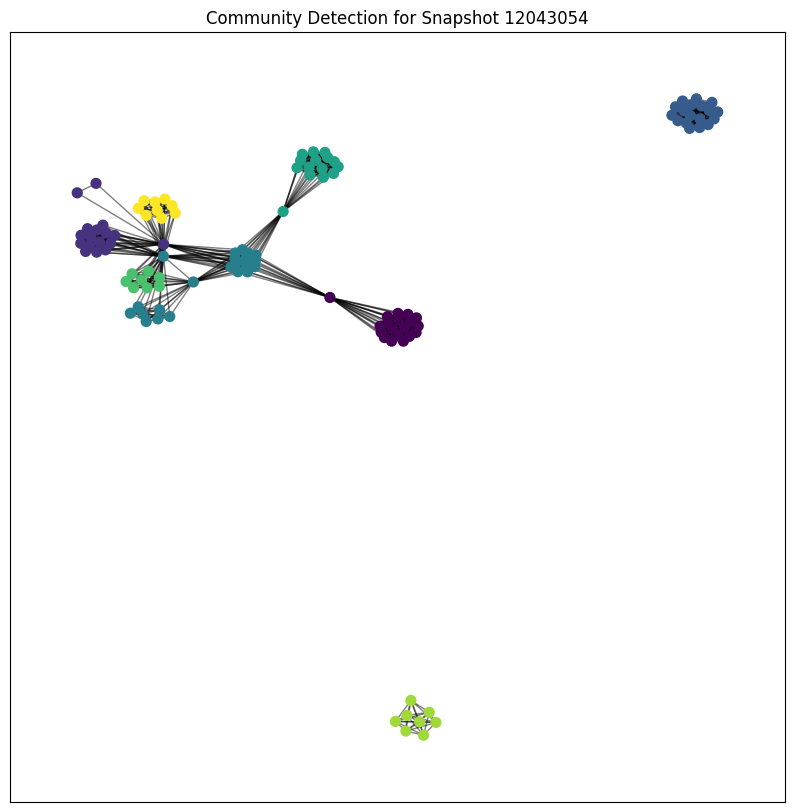

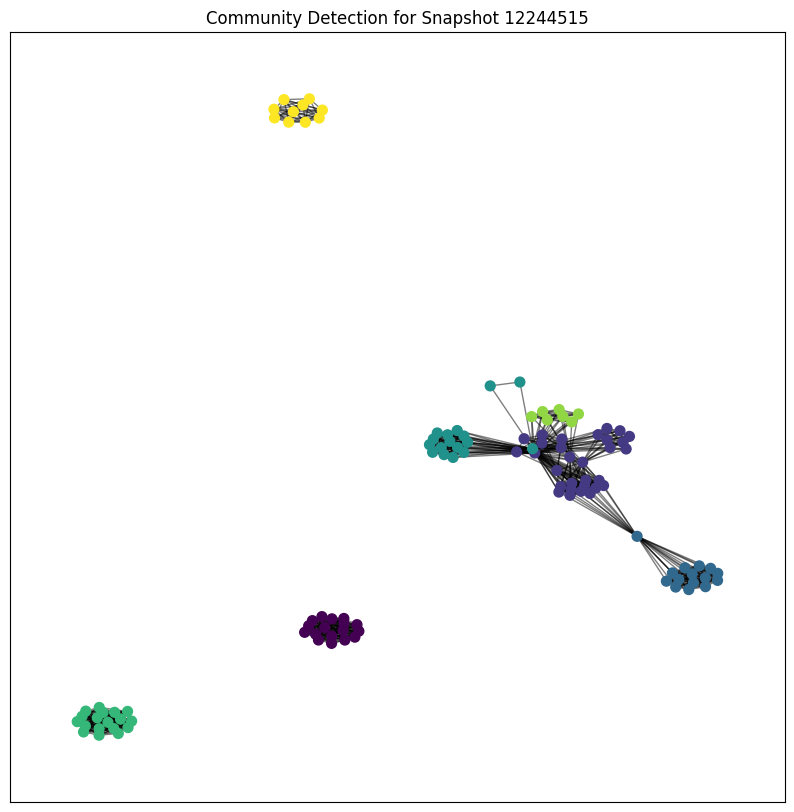

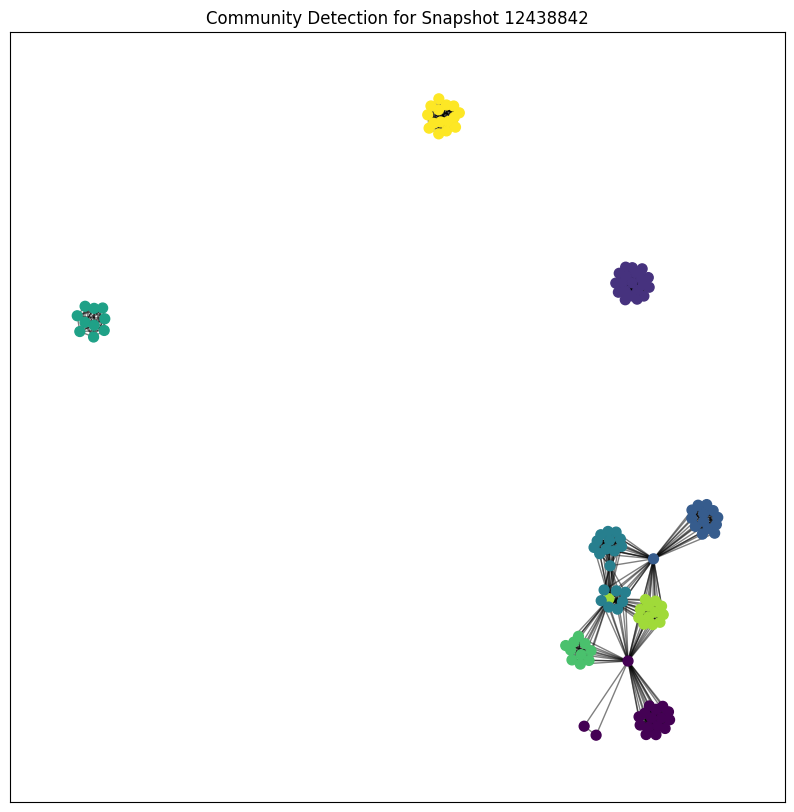

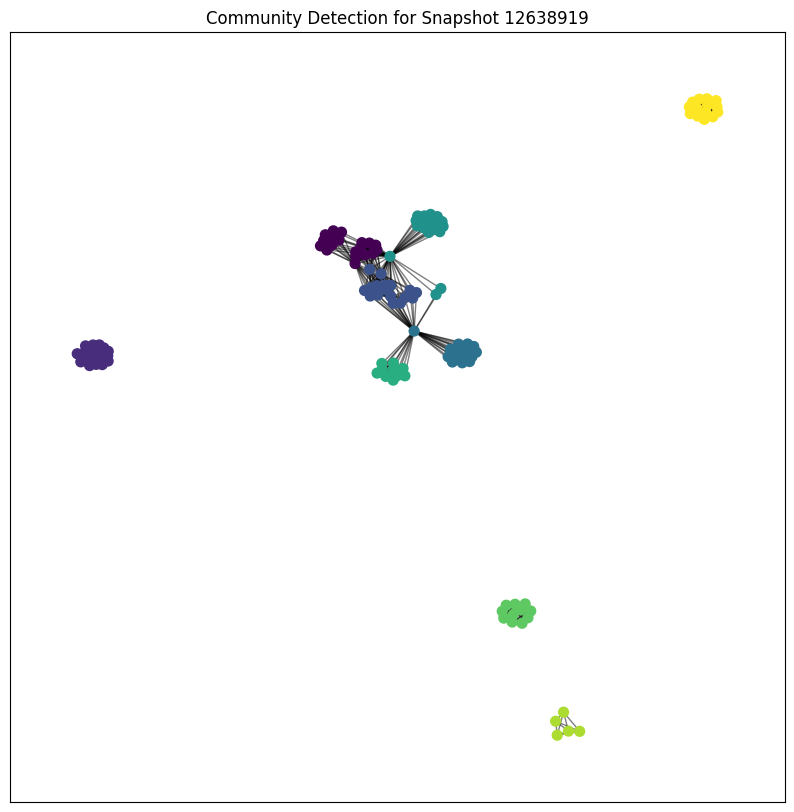

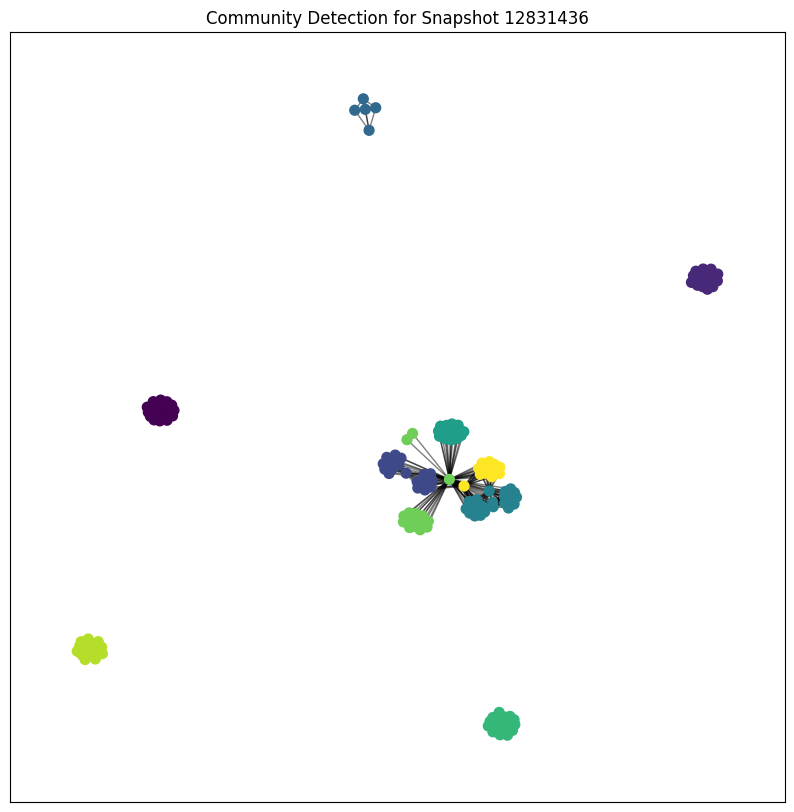

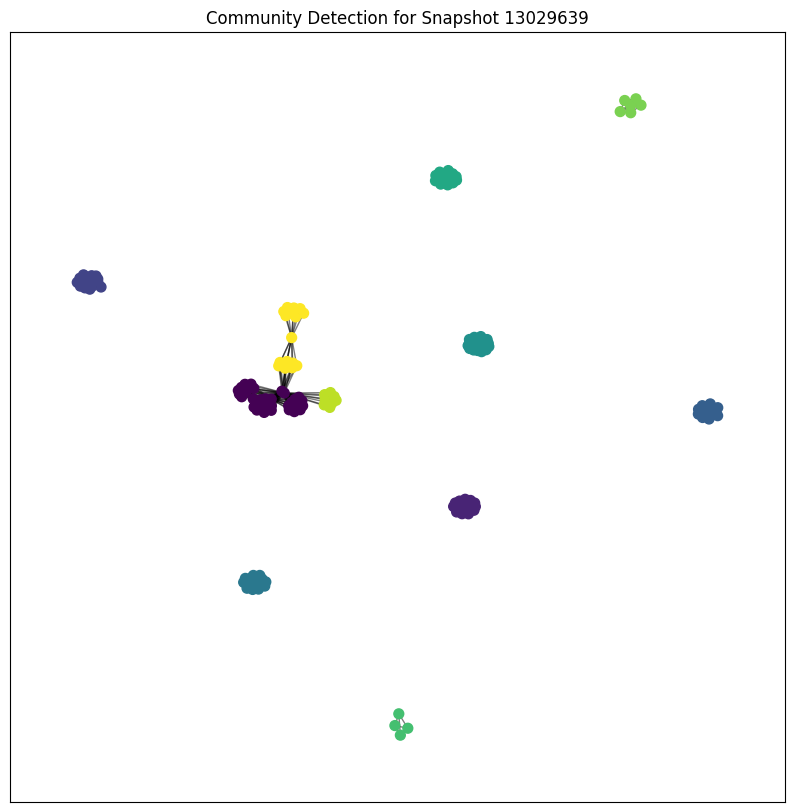

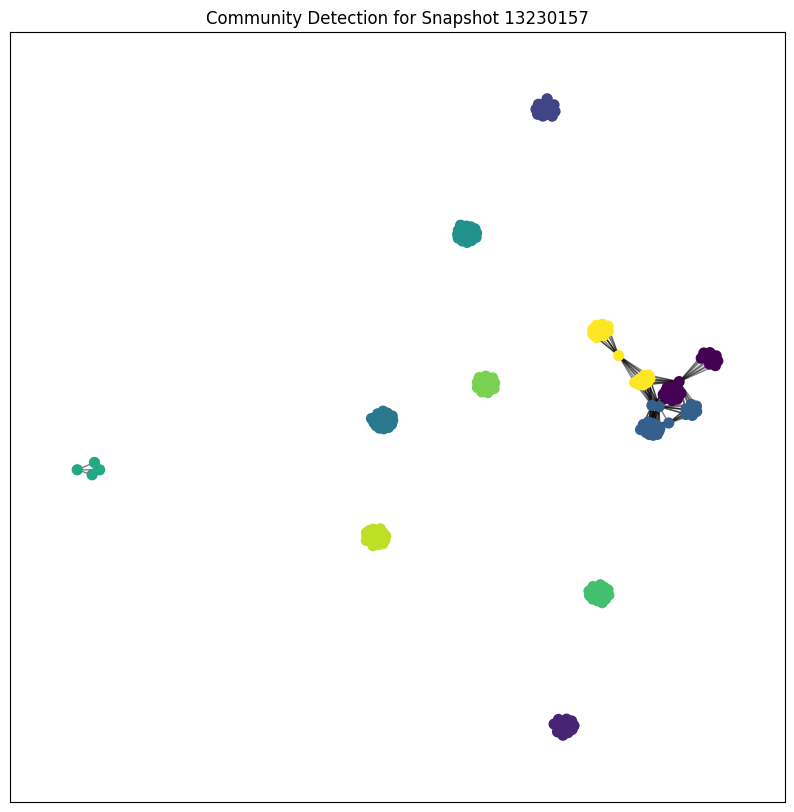

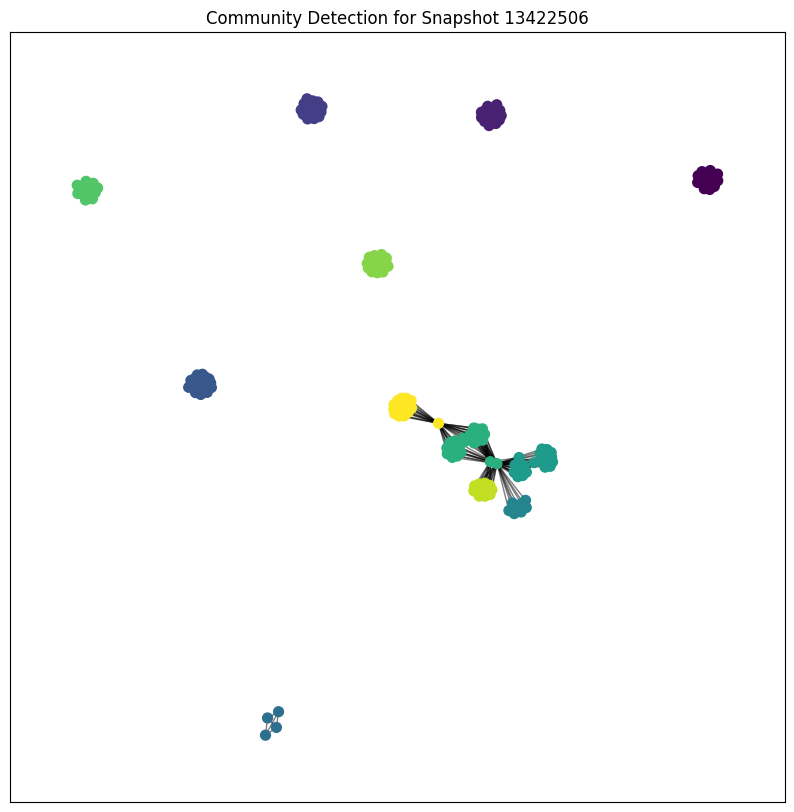

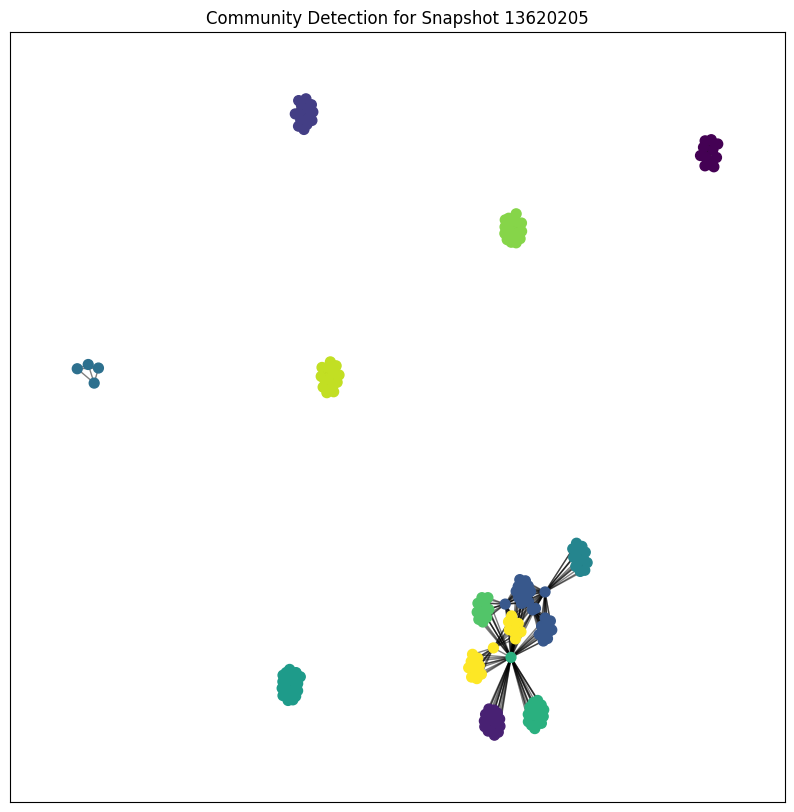

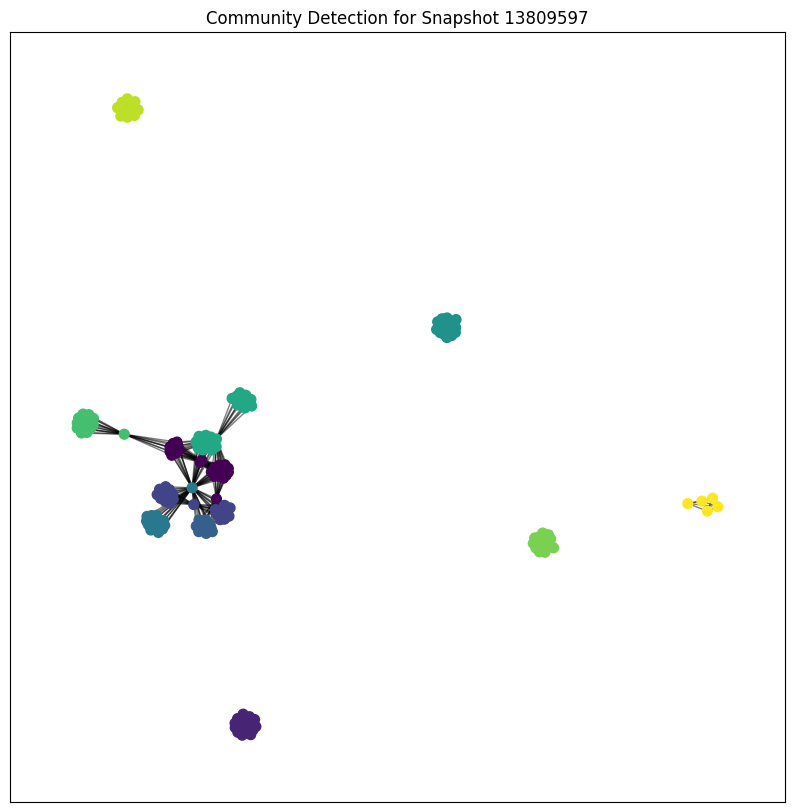

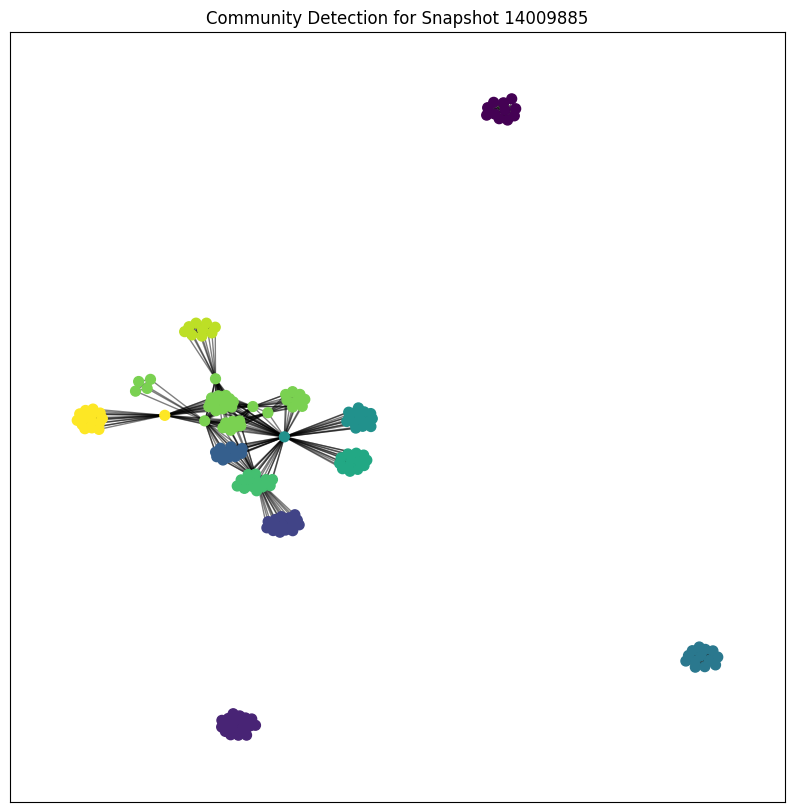

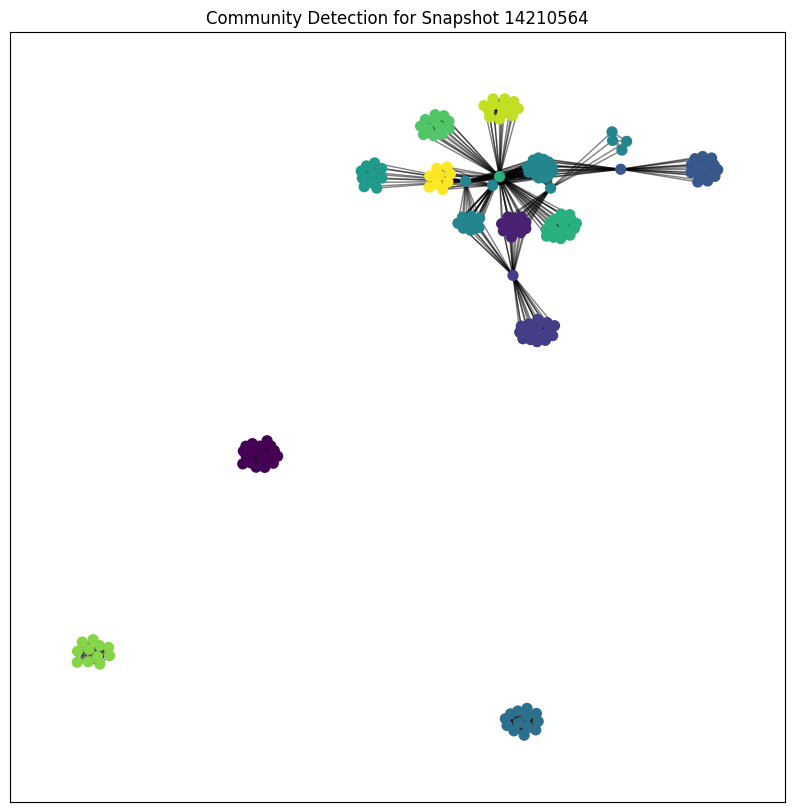

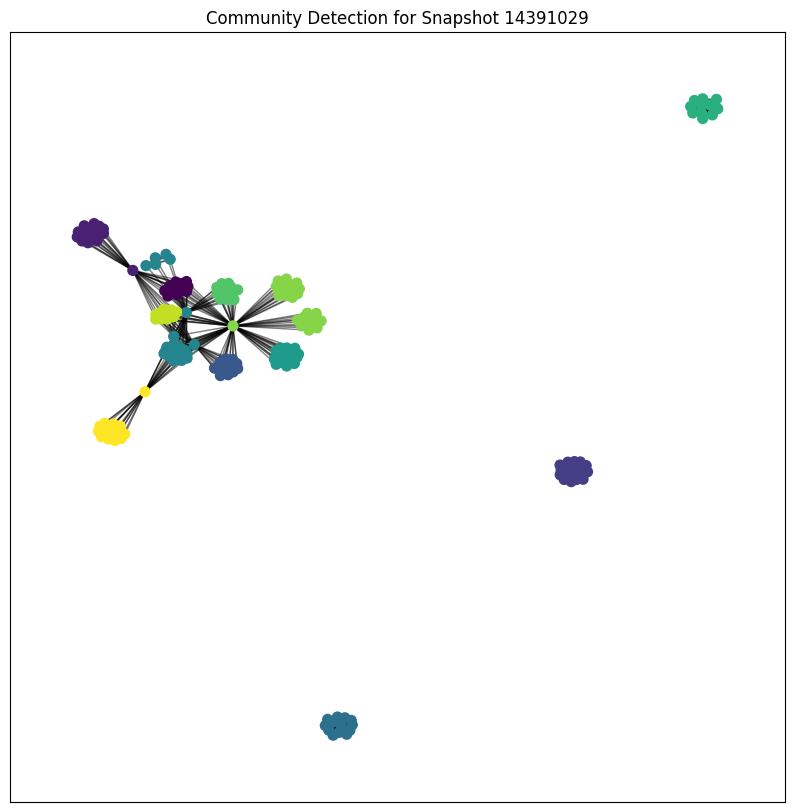

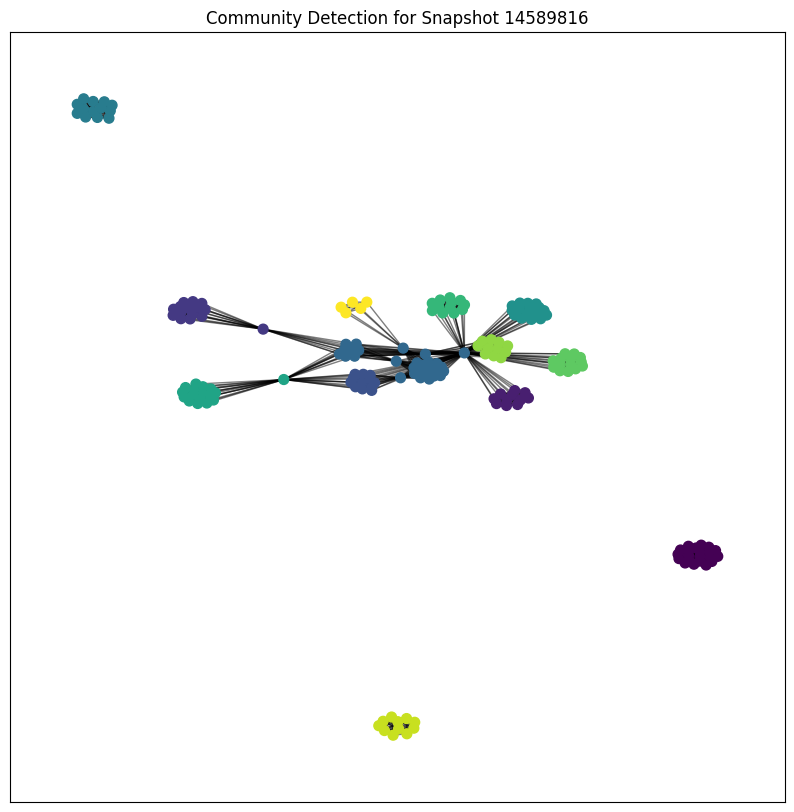

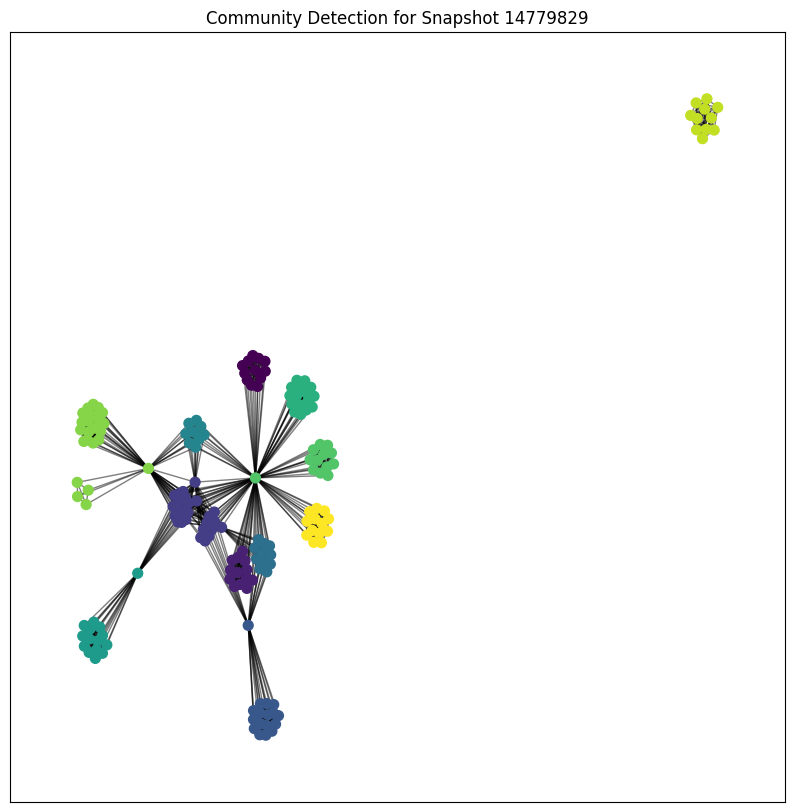

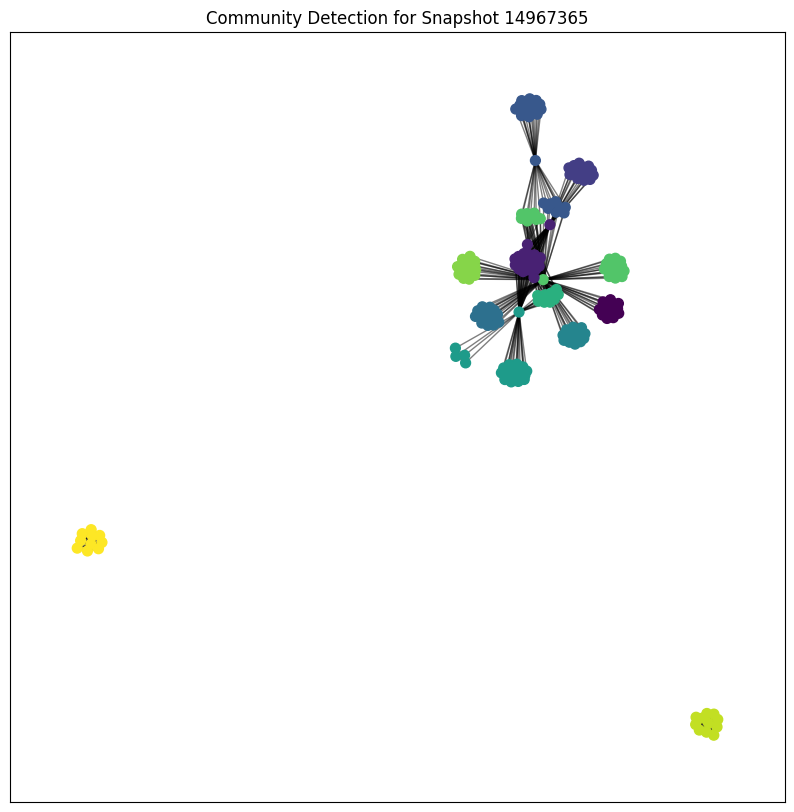

In [338]:
import os
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from os.path import join

#Load the Graph Data
def load_graphs(graph_directory):
    graphs = {}
    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            graphs[snapshot_time] = G
    return graphs

#Apply Louvain Method for Community Detection
def detect_communities(graphs):
    communities = {}
    for snapshot_time, G in graphs.items():
        partition = community_louvain.best_partition(G)
        communities[snapshot_time] = partition
        # Set the community as an attribute for each node
        nx.set_node_attributes(G, partition, 'community')
    return communities

# Visualize the Communities
def visualize_communities(graphs, communities):
    for snapshot_time, G in graphs.items():
        partition = communities[snapshot_time]
        pos = nx.spring_layout(G)
        plt.figure(figsize=(10, 10))
        cmap = plt.get_cmap('viridis')
        nx.draw_networkx_nodes(G, pos, node_size=50, cmap=cmap, node_color=list(partition.values()))
        nx.draw_networkx_edges(G, pos, alpha=0.5)
        plt.title(f"Community Detection for Snapshot {snapshot_time}")
        plt.show()

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

graphs = load_graphs(graph_directory)

communities = detect_communities(graphs)

visualize_communities(graphs, communities)

# generating communities and saving them

In [ ]:
import json

def save_communities(partition, filename):
    with open(filename, 'w') as file:
        json.dump(partition, file)

def load_communities(filename):
    with open(filename, 'r') as file:
        return json.load(file)

def generate_temporal_communities(graph_directory, enriched_graph_directory, token_info_path, save_directory):
    """
    Detect communities using the Louvain algorithm and adapt them across time.
    Save the community assignments to ensure consistency across runs.
    """
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  
    token_map = df_tokens.set_index('address')['name'].to_dict()

    temporal_community_stats = []
    prev_partition = None

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            normal_graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)  

            if not os.path.exists(enriched_graph_file):
                print(f"Enriched graph file not found: {enriched_graph_file}")
                continue

            G = nx.read_graphml(normal_graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Define path to save the community assignments
            community_file = join(save_directory, f"{filename}_communities.json")

            # Load existing community assignments if they exist, otherwise detect and save
            if os.path.exists(community_file):
                curr_partition = load_communities(community_file)
            else:
                curr_partition = community_louvain.best_partition(G)
                save_communities(curr_partition, community_file)

            # Temporal smoothing: match communities with the previous snapshot
            if prev_partition is not None:
                curr_partition = match_communities_across_snapshots(prev_partition, curr_partition, G)

            # Update the graph with new community labels
            nx.set_node_attributes(G, curr_partition, 'community')

            # Label nodes with token names from the enriched graph
            community_token_stats = defaultdict(lambda: defaultdict(int))
            for node, data in G.nodes(data=True):
                community = data['community']
                if node in enriched_G.nodes():
                    token_address = enriched_G.nodes[node].get('token_address', '').lower()
                    token_name = token_map.get(token_address, 'Unknown Token')
                    community_token_stats[community][token_name] += 1

            # Store results for the current snapshot
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, tokens in community_token_stats.items():
                for token_name, count in tokens.items():
                    temporal_community_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

            # Update previous partition for the next snapshot
            prev_partition = curr_partition

    # Convert to DataFrame for better display and analysis
    return pd.DataFrame(temporal_community_stats)


# Calculating modularity in temporal bound communities 

# Different approach do not run this code do not change this file

In [ ]:
import os
import networkx as nx
import pandas as pd
from os.path import join
import community as community_louvain

def match_communities_across_snapshots(prev_partition, curr_partition):
    """Match communities from the previous snapshot to the current snapshot based on node overlap."""
    community_map = {}
    for node, curr_comm in curr_partition.items():
        if node in prev_partition:
            prev_comm = prev_partition[node]
            community_map[curr_comm] = prev_comm
        else:
            community_map[curr_comm] = curr_comm
    
    new_partition = {node: community_map[curr_comm] for node, curr_comm in curr_partition.items()}
    return new_partition

def detect_and_save_temporal_communities_with_tokens(graph_directory, enriched_graph_directory, output_file, snapshot_dates, token_info_path):
    community_data = []
    prev_partition = None  
    
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    for filename in sorted(os.listdir(graph_directory)):
        if filename.endswith('.graphml'):
            graph_file = join(graph_directory, filename)
            enriched_graph_file = join(enriched_graph_directory, filename)

            G = nx.read_graphml(graph_file)
            enriched_G = nx.read_graphml(enriched_graph_file)

            # Perform community detection
            curr_partition = community_louvain.best_partition(G)

            if prev_partition is not None:
                curr_partition = match_communities_across_snapshots(prev_partition, curr_partition)

            prev_partition = curr_partition

            snapshot_id = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')

            for node, community in curr_partition.items():
                token_address = enriched_G.nodes[node].get('token_address', '').lower() if node in enriched_G else None
                token_name = token_map.get(token_address, 'Unknown Token') if token_address else 'Unknown Token'
                
                community_data.append({
                    'Snapshot': snapshot_id,
                    'Date': snapshot_date,
                    'Node': node,
                    'Token': token_name,
                    'Community': community
                })

    community_df = pd.DataFrame(community_data)
    community_df.to_csv(output_file, index=False)
    print(f"Temporal community assignments with tokens saved to {output_file}")

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'

snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Run the temporal community detection and save the results with tokens
detect_and_save_temporal_communities_with_tokens(graph_directory, enriched_graph_directory, output_file, snapshot_dates, token_info_path)



In [339]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id, snapshot_dates):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)

    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    snapshot_date = snapshot_dates.get(snapshot_id, 'Unknown Date')
    
    print(f"Filtering for Snapshot ID: {snapshot_id} with Date: {snapshot_date}")
    print("Available Snapshot IDs in the file:", community_df['Snapshot'].unique())

    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node to community
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))

    # Apply the community labels to the graph nodes
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def analyze_graph_with_consistent_communities(graph_directory, community_file, snapshot_id, snapshot_dates):
    """Load the graph and apply consistent community assignments."""
    graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
    G = nx.read_graphml(graph_file)

    # Apply saved community assignments
    load_and_apply_saved_communities(G, community_file, snapshot_id, snapshot_dates)

 
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_id = '11659570'  

analyze_graph_with_consistent_communities(graph_directory, community_file, snapshot_id, snapshot_dates)


Filtering for Snapshot ID: 11659570 with Date: 2021-01
Available Snapshot IDs in the file: ['11659570' '11861210' '12043054' '12244515' '12438842' '12638919'
 '12831436' '13029639' '13230157' '13422506' '13620205' '13809597'
 '14009885' '14210564' '14391029' '14589816' '14779829' '14967365']


# Modularity comparison with temporal communities vs normal louvain

In [340]:
import pandas as pd
import networkx as nx
import community as community_louvain
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]
    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_modularity(graph):
    """Calculate the modularity of the graph based on the community assignments."""
    partition = defaultdict(set)
    for node, data in graph.nodes(data=True):
        community = data['community']
        partition[community].add(node)

    # Convert partition to a list of sets
    partition = list(partition.values())
    
    # Calculate modularity using networkx
    modularity = nx.algorithms.community.modularity(graph, partition)
    
    return modularity

def evaluate_modularity_saved_vs_louvain(graph_directory, community_file, snapshot_dates):
    """Compare the modularity of saved communities vs Louvain method across snapshots."""
    results = []

    for snapshot_id, snapshot_date in snapshot_dates.items():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        # Calculate modularity for saved communities
        load_and_apply_saved_communities(G, community_file, snapshot_id)
        modularity_saved = calculate_modularity(G)

        # Calculate modularity for Louvain method
        louvain_partition = community_louvain.best_partition(G)
        nx.set_node_attributes(G, louvain_partition, 'community')
        modularity_louvain = calculate_modularity(G)

        results.append({
            'Snapshot': snapshot_id,
            'Date': snapshot_date,
            'Modularity (Saved Communities)': modularity_saved,
            'Modularity (Louvain)': modularity_louvain
        })

    return results

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

modularity_comparison = evaluate_modularity_saved_vs_louvain(graph_directory, community_file, snapshot_dates)

df_modularity_comparison = pd.DataFrame(modularity_comparison)

print(df_modularity_comparison)


    Snapshot     Date  Modularity (Saved Communities)  Modularity (Louvain)
0   11659570  2021-01                        0.761596              0.761596
1   11861210  2021-02                        0.750430              0.750430
2   12043054  2021-03                        0.723538              0.728361
3   12244515  2021-04                        0.736130              0.739703
4   12438842  2021-05                        0.727489              0.760034
5   12638919  2021-06                        0.703209              0.754211
6   12831436  2021-07                        0.723954              0.796290
7   13029639  2021-08                        0.788883              0.836190
8   13230157  2021-09                        0.788831              0.839862
9   13422506  2021-10                        0.774489              0.816359
10  13620205  2021-11                        0.752260              0.807611
11  13809597  2021-12                        0.729595              0.786257
12  14009885

# Community analysis

In [341]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))

    # Apply the community labels to the graph nodes
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def analyze_community_sizes_for_snapshot(graph_directory, community_file, snapshot_id):
    """Analyze the community sizes for a specific snapshot."""
    graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
    G = nx.read_graphml(graph_file)

    load_and_apply_saved_communities(G, community_file, snapshot_id)

    # Calculate community sizes
    community_sizes = calculate_community_sizes(G)

    print(f"Community Sizes for Snapshot {snapshot_id}:")
    for community, size in community_sizes.items():
        print(f"Community {community}: {size} wallets")

    return community_sizes

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_id = '11659570'  # Specific snapshot ID for analysis

community_sizes = analyze_community_sizes_for_snapshot(graph_directory, community_file, snapshot_id)



Community Sizes for Snapshot 11659570:
Community 3: 21 wallets
Community 5: 17 wallets
Community 0: 19 wallets
Community 6: 8 wallets
Community 7: 6 wallets
Community 4: 17 wallets
Community 8: 9 wallets
Community 2: 3 wallets
Community 1: 18 wallets


In [342]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))

    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_community_tokens_for_snapshot(graph_directory, community_file, snapshot_id):
    """Analyze the community sizes and tokens for a specific snapshot."""
    graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
    G = nx.read_graphml(graph_file)

    load_and_apply_saved_communities(G, community_file, snapshot_id)

    community_data = defaultdict(lambda: defaultdict(int))

    for node, data in G.nodes(data=True):
        community = data.get('community', 'Unknown')
        token = data.get('token', 'Unknown Token')
        community_data[community][token] += 1

    print(f"Community Sizes and Tokens for Snapshot {snapshot_id}:")
    for community, tokens in community_data.items():
        print(f"\nCommunity {community}:")
        total_size = sum(tokens.values())
        print(f"  Total Size: {total_size} wallets")
        for token, count in tokens.items():
            print(f"  Token {token}: {count} wallets")

    return community_data

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_id = '11659570'  # Specific snapshot ID for analysis

community_tokens = analyze_community_tokens_for_snapshot(graph_directory, community_file, snapshot_id)


Community Sizes and Tokens for Snapshot 11659570:

Community 3:
  Total Size: 21 wallets
  Token Maker: 21 wallets

Community 5:
  Total Size: 17 wallets
  Token Compound: 17 wallets

Community 0:
  Total Size: 19 wallets
  Token Sushi: 7 wallets
  Token Yearn Finance: 11 wallets
  Token Curve: 1 wallets

Community 6:
  Total Size: 8 wallets
  Token Curve: 8 wallets

Community 7:
  Total Size: 6 wallets
  Token Aave: 6 wallets

Community 4:
  Total Size: 17 wallets
  Token Uniswap: 16 wallets
  Token Curve: 1 wallets

Community 8:
  Total Size: 9 wallets
  Token Balancer: 9 wallets

Community 2:
  Total Size: 3 wallets
  Token 1Inch: 3 wallets

Community 1:
  Total Size: 18 wallets
  Token Lido: 18 wallets


In [167]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots."""
    community_size_over_time = defaultdict(lambda: defaultdict(int))

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_sizes = calculate_community_sizes(G)

        snapshot_date = snapshot_dates[snapshot_id]
        for community, size in community_sizes.items():
            community_size_over_time[community][snapshot_date] = size

    return community_size_over_time

def calculate_community_growth(community_size_over_time):
    """Calculate the growth of each community over the entire period."""
    community_growth = {}

    for community, sizes in community_size_over_time.items():
        sorted_dates = sorted(sizes.keys())
        initial_size = sizes[sorted_dates[0]]
        final_size = sizes[sorted_dates[-1]]
        growth = final_size - initial_size
        community_growth[community] = growth

    return community_growth

def find_community_with_max_growth(community_growth):
    """Identify the community with the maximum growth."""
    max_growth_community = max(community_growth, key=community_growth.get)
    max_growth = community_growth[max_growth_community]
    return max_growth_community, max_growth

# Paths and snapshot dates
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Track community growth over the entire period
community_size_over_time = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

# Calculate the growth of each community
community_growth = calculate_community_growth(community_size_over_time)

# Find the community with the maximum growth
max_growth_community, max_growth = find_community_with_max_growth(community_growth)

print(f"The community that grew the most is Community {max_growth_community} with a growth of {max_growth} wallets.")


The community that grew the most is Community 1 with a growth of 38 wallets.


In [ ]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    # Filter the community data for the specific snapshot
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    # Create a mapping of node (wallet) to community and token
    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates):
    """Analyze how tokens are distributed within each community across snapshots."""
    token_distribution_over_time = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
    all_dates = set(snapshot_dates.values())

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Analyze token distribution within communities
        for node, data in G.nodes(data=True):
            community = str(data.get('community', 'Unknown'))  # Convert community IDs to strings
            token = data.get('token', 'Unknown Token')
            snapshot_date = snapshot_dates[snapshot_id]
            token_distribution_over_time[community][token][snapshot_date] += 1

        # Ensure every token has an entry for each date
        for community in token_distribution_over_time:
            for token in token_distribution_over_time[community]:
                for date in all_dates:
                    if date not in token_distribution_over_time[community][token]:
                        token_distribution_over_time[community][token][date] = 0

    return token_distribution_over_time

def plot_token_distribution_grid(token_distribution_over_time, community_ids):
    """Plot a grid of token distribution over time for multiple communities."""
    # Set up the grid for plotting
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to easily iterate over a 1D array of axes

    community_ids_sorted = sorted(community_ids, key=lambda x: int(x))

    for i, community_id in enumerate(community_ids_sorted):
        if i >= len(axes):  # Prevent index error if there are more communities than axes
            break

        community_data = token_distribution_over_time.get(community_id, {})
        
        if not community_data:
            print(f"No token distribution data available for Community {community_id}.")
            continue

        all_dates = sorted(set(date for token in community_data.values() for date in token.keys()), key=pd.to_datetime)
        tokens = sorted(community_data.keys())

        data = {token: [] for token in tokens}
        for date in all_dates:
            for token in tokens:
                data[token].append(community_data[token].get(date, 0))

        all_dates = pd.to_datetime(all_dates)

        bottom = [0] * len(all_dates)
        bar_width = 25  # Width for bars to be visible
        for token in tokens:
            axes[i].bar(all_dates, data[token], bottom=bottom, width=bar_width, label=token, align='center')
            bottom = [i + j for i, j in zip(bottom, data[token])]

        axes[i].set_xlabel("Date")
        axes[i].set_ylabel(f"Community {community_id} Size")
        axes[i].set_title(f"Community {community_id}")
        axes[i].tick_params(axis='x', rotation=45)
        
        axes[i].legend(title="Tokens", fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.subplots_adjust(right=0.85)  # Adjust right margin to fit legends
    plt.show()

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Analyze token distribution in communities
token_distribution_over_time = analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates)

# Check available communities before plotting
available_communities = list(token_distribution_over_time.keys())
print("Available Communities:", available_communities)

# Plot the grid of token distributions for the first 10 communities
plot_token_distribution_grid(token_distribution_over_time, community_ids=available_communities[:10])


Available Communities: ['3', '5', '0', '6', '7', '4', '8', '2', '1', '9', '10']


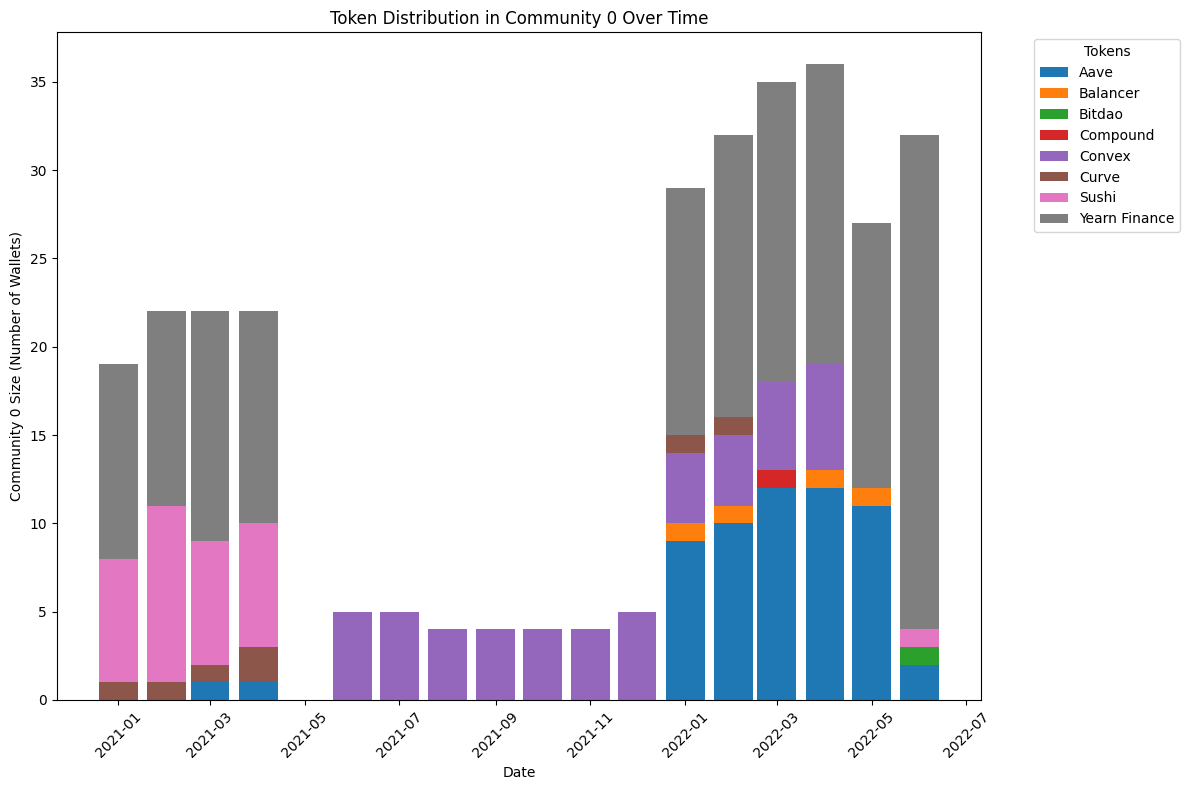

In [343]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates):
    """Analyze how tokens are distributed within each community across snapshots."""
    token_distribution_over_time = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
    all_dates = set(snapshot_dates.values())

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        for node, data in G.nodes(data=True):
            community = str(data.get('community', 'Unknown')) 
            token = data.get('token', 'Unknown Token')
            snapshot_date = snapshot_dates[snapshot_id]
            token_distribution_over_time[community][token][snapshot_date] += 1

        for community in token_distribution_over_time:
            for token in token_distribution_over_time[community]:
                for date in all_dates:
                    if date not in token_distribution_over_time[community][token]:
                        token_distribution_over_time[community][token][date] = 0

    return token_distribution_over_time

def plot_token_distribution_over_time(token_distribution_over_time, community_id):
    """Plot the token distribution over time for a specific community."""
    if community_id not in token_distribution_over_time:
        print(f"No data found for Community {community_id}.")
        return
    
    community_data = token_distribution_over_time[community_id]
    
    if not community_data:
        print(f"No token distribution data available for Community {community_id}.")
        return

    all_dates = sorted(set(date for token in community_data.values() for date in token.keys()), key=pd.to_datetime)
    tokens = sorted(community_data.keys())

    data = {token: [] for token in tokens}
    for date in all_dates:
        for token in tokens:
            data[token].append(community_data[token].get(date, 0))

    all_dates = pd.to_datetime(all_dates)

    plt.figure(figsize=(12, 8))
    bottom = [0] * len(all_dates)
    bar_width = 25  
    for token in tokens:
        plt.bar(all_dates, data[token], bottom=bottom, width=bar_width, label=token, align='center')
        bottom = [i + j for i, j in zip(bottom, data[token])]

    plt.xlabel("Date")
    plt.ylabel(f"Community {community_id} Size (Number of Wallets)")
    plt.title(f"Token Distribution in Community {community_id} Over Time")
    plt.xticks(rotation=45)
    plt.legend(title="Tokens", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Analyze token distribution in communities
token_distribution_over_time = analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates)

# Check available communities before plotting
print("Available Communities:", list(token_distribution_over_time.keys()))

# Plot the token distribution for a specific community (e.g., Community '0')
plot_token_distribution_over_time(token_distribution_over_time, community_id='0')




# Final token graph

Available Communities: ['3', '5', '0', '6', '7', '4', '8', '2', '1', '9', '10']


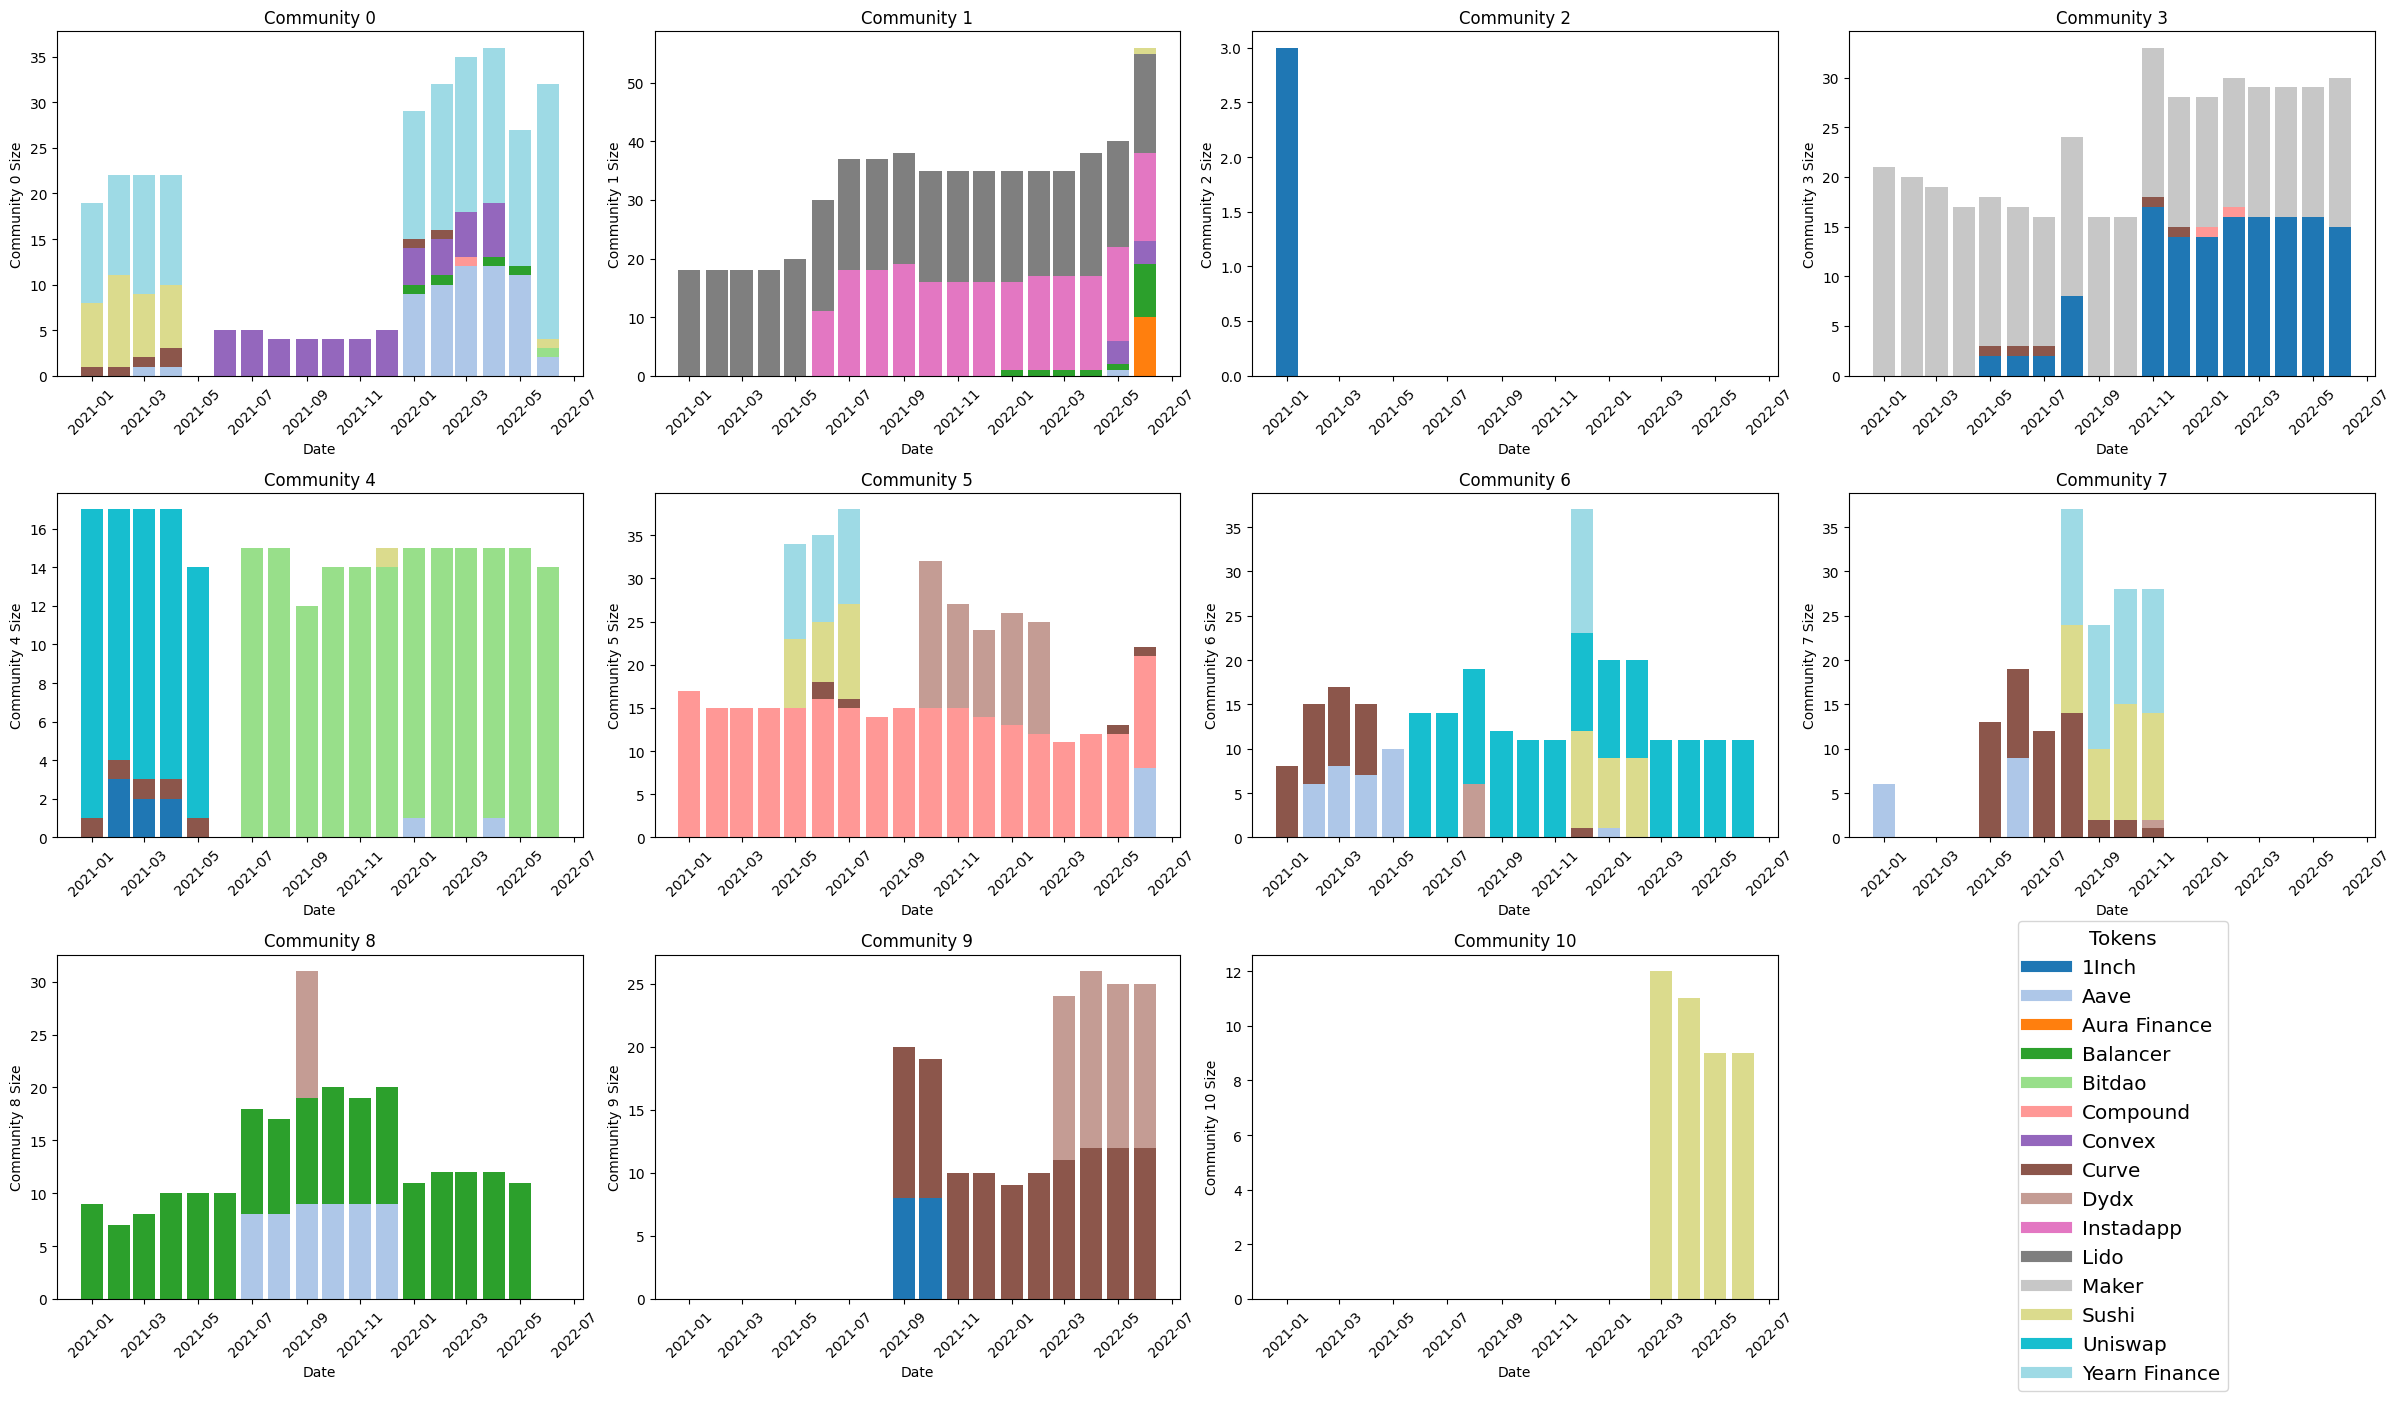

In [345]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    token_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Token']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')
        graph.nodes[node]['token'] = token_map.get(node, 'Unknown Token')

def analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates):
    """Analyze how tokens are distributed within each community across snapshots."""
    token_distribution_over_time = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
    all_dates = set(snapshot_dates.values())

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        for node, data in G.nodes(data=True):
            community = str(data.get('community', 'Unknown'))  
            token = data.get('token', 'Unknown Token')
            snapshot_date = snapshot_dates[snapshot_id]
            token_distribution_over_time[community][token][snapshot_date] += 1

        for community in token_distribution_over_time:
            for token in token_distribution_over_time[community]:
                for date in all_dates:
                    if date not in token_distribution_over_time[community][token]:
                        token_distribution_over_time[community][token][date] = 0

    return token_distribution_over_time

def plot_token_distribution_grid(token_distribution_over_time, community_ids):
    """Plot a grid of token distribution over time for multiple communities with a single legend in the bottom right corner."""
    fig, axes = plt.subplots(3, 4, figsize=(28, 14))  
    axes = axes.flatten()  
    community_ids_sorted = sorted(community_ids, key=lambda x: int(x))

    all_tokens = sorted(set(token for community_data in token_distribution_over_time.values() for token in community_data.keys()))
    color_map = plt.get_cmap('tab20', len(all_tokens))  
    token_colors = {token: color_map(i) for i, token in enumerate(all_tokens)}

    for i, community_id in enumerate(community_ids_sorted):
        if i >= len(axes):  # Prevent index error if there are more communities than axes
            break

        community_data = token_distribution_over_time.get(community_id, {})
        
        if not community_data:
            print(f"No token distribution data available for Community {community_id}.")
            continue

        all_dates = sorted(set(date for token in community_data.values() for date in token.keys()), key=pd.to_datetime)
        all_dates = [date for date in all_dates if date <= '2022-06']  
        tokens = sorted(community_data.keys())

        data = {token: [] for token in tokens}
        for date in all_dates:
            for token in tokens:
                data[token].append(community_data[token].get(date, 0))

        all_dates = pd.to_datetime(all_dates)

        bottom = [0] * len(all_dates)
        bar_width = 25  
        for token in tokens:
            axes[i].bar(all_dates, data[token], bottom=bottom, width=bar_width, color=token_colors[token], align='center')
            bottom = [i + j for i, j in zip(bottom, data[token])]

        axes[i].set_xlabel("Date")
        axes[i].set_ylabel(f"Community {community_id} Size")
        axes[i].set_title(f"Community {community_id}")
        axes[i].tick_params(axis='x', rotation=45)

    # Hide the last subplot (bottom right corner) to place the legend there
    axes[-1].axis('off')  

    handles = [plt.Line2D([0], [0], color=token_colors[token], linewidth=8) for token in all_tokens]
    labels = all_tokens
    fig.legend(handles, labels, title="Tokens", loc='center', bbox_to_anchor=(0.76, 0.17), fontsize='x-large', title_fontsize='x-large')

    plt.tight_layout()
    plt.subplots_adjust(right=0.85) 
    plt.show()

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

token_distribution_over_time = analyze_token_distribution_in_communities(graph_directory, community_file, snapshot_dates)

available_communities = list(token_distribution_over_time.keys())
print("Available Communities:", available_communities)

plot_token_distribution_grid(token_distribution_over_time, community_ids=available_communities[:11])

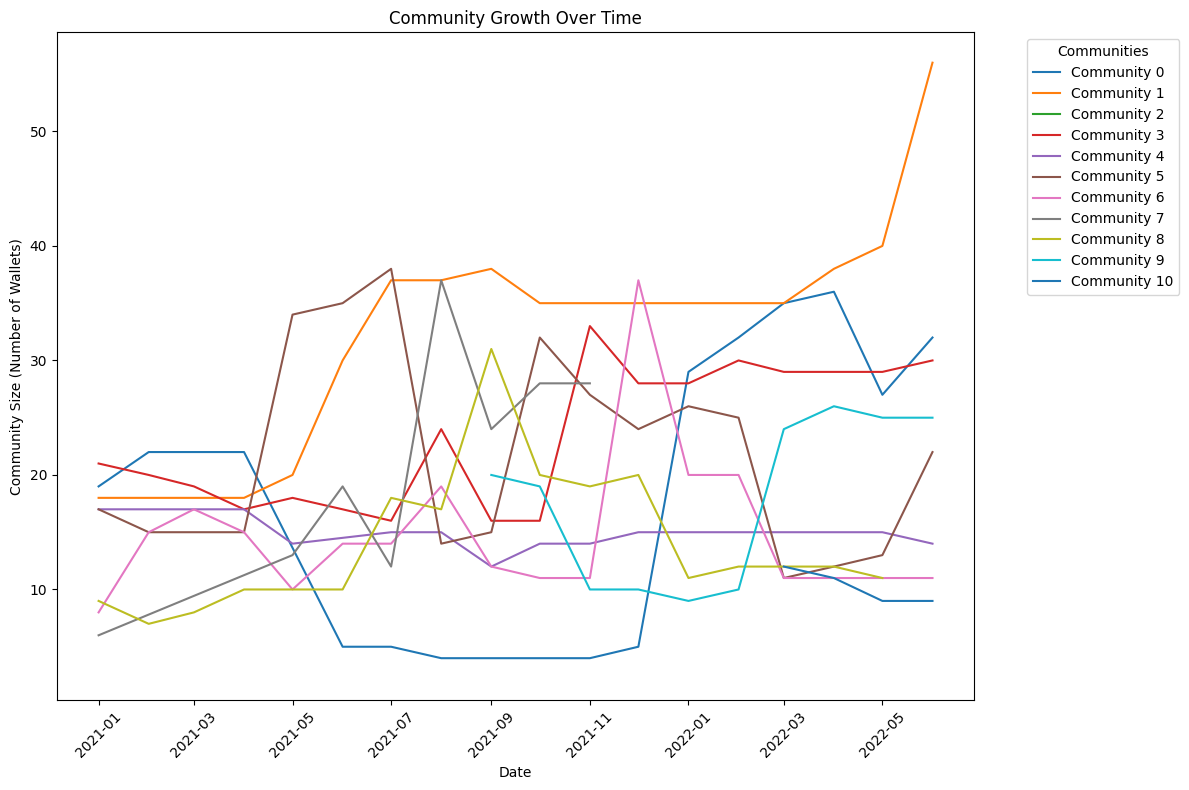

In [346]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots."""
    community_size_over_time = defaultdict(lambda: defaultdict(int))

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_sizes = calculate_community_sizes(G)

        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id])  
        for community, size in community_sizes.items():
            community_size_over_time[community][snapshot_date] = size

    return community_size_over_time

def plot_community_growth_over_time(community_size_over_time):
    """Plot the community growth over time."""
    plt.figure(figsize=(12, 8))

    sorted_communities = sorted(community_size_over_time.keys(), key=lambda x: int(x) if x.isdigit() else float('inf'))

    for community in sorted_communities:
        if community != 'Unknown':  
            sizes = community_size_over_time[community]
            dates = sorted(sizes.keys()) 
            sizes_over_time = [sizes[date] for date in dates]
            plt.plot(dates, sizes_over_time, label=f'Community {community}')

    plt.xlabel("Date")
    plt.ylabel("Community Size (Number of Wallets)")
    plt.title("Community Growth Over Time")
    plt.xticks(rotation=45)
    plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

community_size_over_time = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

plot_community_growth_over_time(community_size_over_time)



# Size ratio of each community

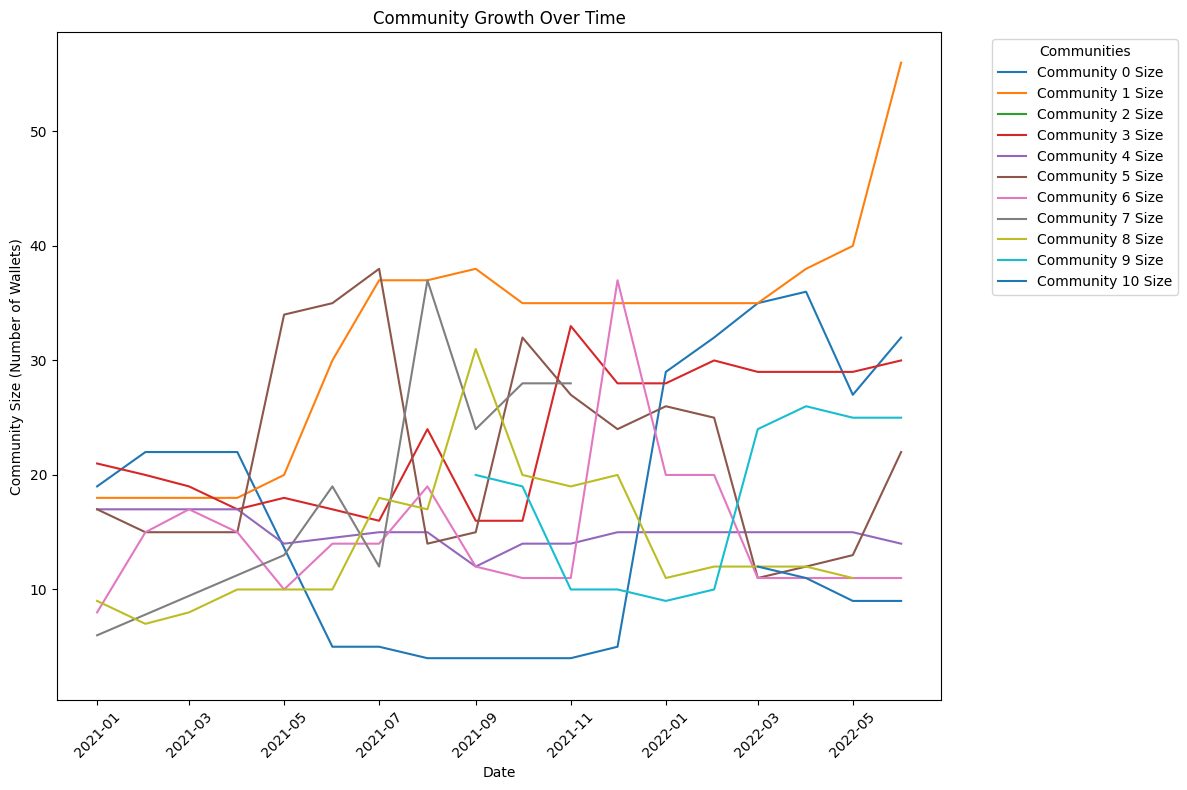

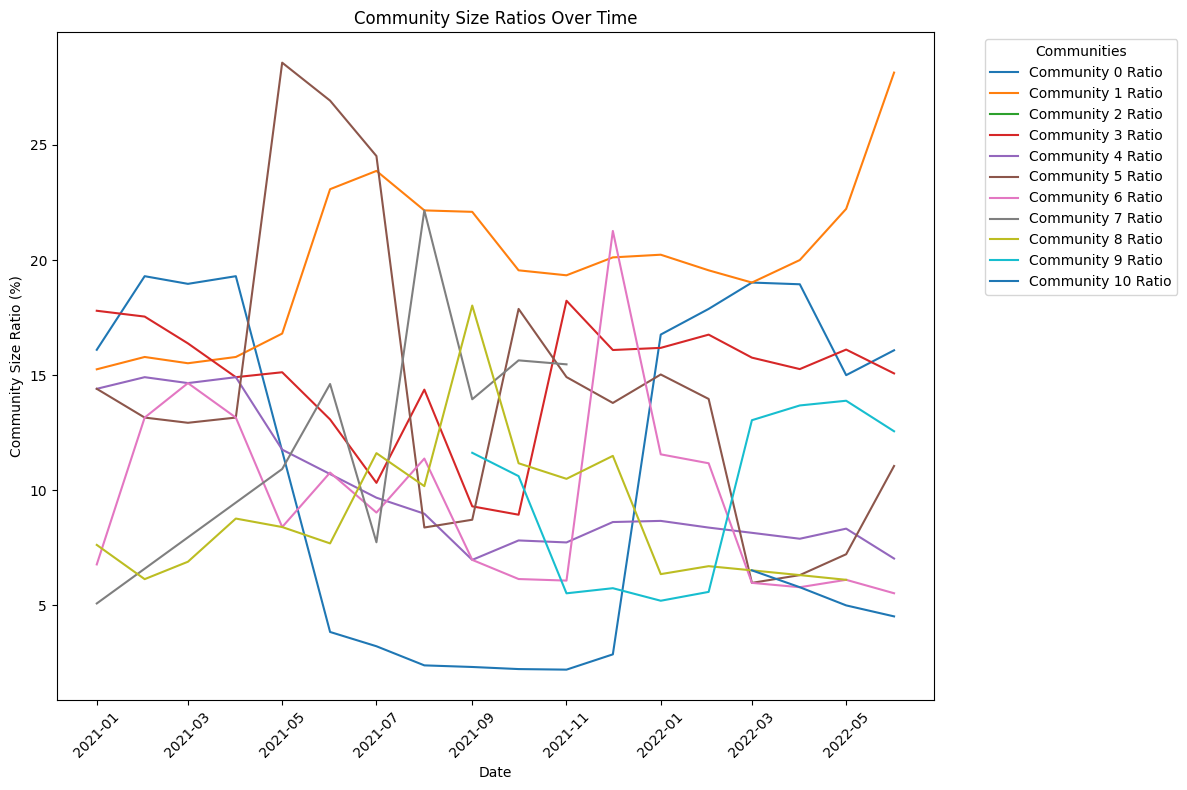

In [ ]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import matplotlib.pyplot as plt

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def calculate_community_size_ratios(community_sizes, total_nodes):
    """Calculate the ratio of each community size to the total number of nodes."""
    community_ratios = {}
    for community, size in community_sizes.items():
        community_ratios[community] = (size / total_nodes) * 100  # Calculate ratio as a percentage
    return community_ratios

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots."""
    community_size_over_time = defaultdict(lambda: defaultdict(int))
    community_ratios_over_time = defaultdict(lambda: defaultdict(float))

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community sizes for this snapshot
        community_sizes = calculate_community_sizes(G)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Calculate the community size ratios for this snapshot
        community_ratios = calculate_community_size_ratios(community_sizes, total_nodes)

        # Store the community sizes and ratios with respect to the snapshot date
        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id])  # Convert to datetime
        for community, size in community_sizes.items():
            community_size_over_time[community][snapshot_date] = size
        for community, ratio in community_ratios.items():
            community_ratios_over_time[community][snapshot_date] = ratio

    return community_size_over_time, community_ratios_over_time

def plot_community_growth_over_time(community_size_over_time, community_ratios_over_time):
    """Plot the community growth over time."""
    plt.figure(figsize=(12, 8))

    sorted_communities = sorted(community_size_over_time.keys(), key=lambda x: int(x) if x.isdigit() else float('inf'))

    for community in sorted_communities:
        if community != 'Unknown':  
            sizes = community_size_over_time[community]
            dates = sorted(sizes.keys())  
            sizes_over_time = [sizes[date] for date in dates]
            plt.plot(dates, sizes_over_time, label=f'Community {community} Size')

    plt.xlabel("Date")
    plt.ylabel("Community Size (Number of Wallets)")
    plt.title("Community Growth Over Time")
    plt.xticks(rotation=45)
    plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plot community size ratios over time
    plt.figure(figsize=(12, 8))
    for community in sorted_communities:
        if community != 'Unknown':
            ratios = community_ratios_over_time[community]
            dates = sorted(ratios.keys())
            ratios_over_time = [ratios[date] for date in dates]
            plt.plot(dates, ratios_over_time, label=f'Community {community} Ratio')

    plt.xlabel("Date")
    plt.ylabel("Community Size Ratio (%)")
    plt.title("Community Size Ratios Over Time")
    plt.xticks(rotation=45)
    plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

community_size_over_time, community_ratios_over_time = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

plot_community_growth_over_time(community_size_over_time, community_ratios_over_time)


In [348]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def calculate_community_size_ratios(community_sizes, total_nodes):
    """Calculate the ratio of each community size to the total number of nodes."""
    community_ratios = {}
    for community, size in community_sizes.items():
        community_ratios[community] = (size / total_nodes) * 100  # Calculate ratio as a percentage
    return community_ratios

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots and store it in a table."""
    results = []

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_sizes = calculate_community_sizes(G)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Calculate the community size ratios 
        community_ratios = calculate_community_size_ratios(community_sizes, total_nodes)

        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id]) 
        for community, size in community_sizes.items():
            results.append({
                'Snapshot Date': snapshot_date,
                'Community': community,
                'Size': size,
                'Total Nodes': total_nodes,
                'Ratio (%)': community_ratios[community]
            })

    results_df = pd.DataFrame(results)
    return results_df

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Track community growth and size ratios over the entire period
results_df = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

print(results_df)




    Snapshot Date Community  Size  Total Nodes  Ratio (%)
0      2021-01-01         3    21          118  17.796610
1      2021-01-01         5    17          118  14.406780
2      2021-01-01         0    19          118  16.101695
3      2021-01-01         6     8          118   6.779661
4      2021-01-01         7     6          118   5.084746
..            ...       ...   ...          ...        ...
141    2022-06-01         5    22          199  11.055276
142    2022-06-01         9    25          199  12.562814
143    2022-06-01        10     9          199   4.522613
144    2022-06-01         3    30          199  15.075377
145    2022-06-01         6    11          199   5.527638

[146 rows x 5 columns]


In [349]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_sizes(graph):
    """Calculate the size of each community in the graph."""
    community_sizes = defaultdict(int)
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_sizes[community] += 1
    return community_sizes

def calculate_community_size_ratios(community_sizes, total_nodes):
    """Calculate the ratio of each community size to the total number of nodes."""
    community_ratios = {}
    for community, size in community_sizes.items():
        community_ratios[community] = (size / total_nodes) * 100  # Calculate ratio as a percentage
    return community_ratios

def track_community_growth_over_time(graph_directory, community_file, snapshot_dates):
    """Track the growth of each community across all snapshots and store it in a table."""
    results = []

    for snapshot_id in snapshot_dates.keys():
        graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        G = nx.read_graphml(graph_file)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_sizes = calculate_community_sizes(G)

        total_nodes = len(G.nodes())

        community_ratios = calculate_community_size_ratios(community_sizes, total_nodes)

        snapshot_date = pd.to_datetime(snapshot_dates[snapshot_id])  # Convert to datetime
        for community, size in community_sizes.items():
            results.append({
                'Snapshot Date': snapshot_date,
                'Community': community,
                'Size': size,
                'Total Nodes': total_nodes,
                'Ratio (%)': community_ratios[community]
            })

    results_df = pd.DataFrame(results)
    return results_df

def calculate_average_ratio(results_df):
    """Calculate the average ratio of each community over the entire period."""
    # Group by 'Community' and calculate the mean of 'Ratio (%)'
    average_ratios = results_df.groupby('Community')['Ratio (%)'].mean().reset_index()
    average_ratios.rename(columns={'Ratio (%)': 'Average Ratio (%)'}, inplace=True)
    
    # Convert 'Community' to numeric and sort by it
    average_ratios['Community'] = pd.to_numeric(average_ratios['Community'], errors='coerce')
    average_ratios = average_ratios.sort_values(by='Community').reset_index(drop=True)
    
    return average_ratios

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-5',
    '12638919': '2021-6',
    '12831436': '2021-7',
    '13029639': '2021-8',
    '13230157': '2021-9',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

# Track community growth and size ratios over the entire period
results_df = track_community_growth_over_time(graph_directory, community_file, snapshot_dates)

# Calculate the average ratio for each community
average_ratios_df = calculate_average_ratio(results_df)

print(average_ratios_df)



    Community  Average Ratio (%)
0           0          11.556718
1           1          19.918207
2           2           2.542373
3           3          14.847167
4           4           9.937057
5           5          14.273481
6           6           9.663155
7           7          13.198460
8           8           8.854296
9           9           9.748272
10         10           5.458456


In [350]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': set(), 'density': 0.0})

    # Collect the tokens for each community and calculate the size
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'].add(token)

    # Calculate density for each community
    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  # Density is zero for a single-node community

    return community_metrics

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, and density of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': set(), 'density': []})

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        apply_token_names(G, enriched_G, token_map)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_metrics = calculate_community_metrics(G)

        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['tokens'].update(metrics['tokens'])
            community_metrics_over_time[community]['density'].append(metrics['density'])

    return community_metrics_over_time

def calculate_average_metrics_and_list_tokens(community_metrics_over_time):
    """Calculate the average size, token diversity, density, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = sum(metrics['size']) / len(metrics['size'])
        avg_density = sum(metrics['density']) / len(metrics['density'])
        token_list = ', '.join(sorted(metrics['tokens']))  # List all unique tokens
        
        average_metrics.append({
            'Community': community,
            'Average Size': avg_size,
            'Average Density': avg_density,
            'Tokens': token_list
        })

    return average_metrics

normal_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Track community metrics over the entire period
community_metrics_over_time = track_community_metrics_over_time(normal_graph_path, enriched_graph_path, community_file, token_map, snapshot_dates)

# Calculate average metrics and list all tokens for each community
average_metrics = calculate_average_metrics_and_list_tokens(community_metrics_over_time)

average_metrics_df = pd.DataFrame(average_metrics)

print(average_metrics_df)


   Community  Average Size  Average Density  \
0          3     23.333333         0.711582   
1          5     21.666667         0.730001   
2          0     18.058824         0.757178   
3          6     14.833333         0.797041   
4          7     20.875000         0.719091   
5          4     15.058824         0.958910   
6          8     13.941176         0.821956   
7          2      3.000000         1.000000   
8          1     32.111111         0.613427   
9          9     17.800000         0.703736   
10        10     10.250000         1.000000   

                                               Tokens  
0                       1Inch, Compound, Curve, Maker  
1   Aave, Compound, Curve, Dydx, Sushi, Yearn Finance  
2   Aave, Balancer, Bitdao, Compound, Convex, Curv...  
3    Aave, Curve, Dydx, Sushi, Uniswap, Yearn Finance  
4             Aave, Curve, Dydx, Sushi, Yearn Finance  
5          1Inch, Aave, Bitdao, Curve, Sushi, Uniswap  
6                                Aave, Bala

In [351]:
def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': set(), 'density': [], 'presence': 0})

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        apply_token_names(G, enriched_G, token_map)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_metrics = calculate_community_metrics(G)

        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['tokens'].update(metrics['tokens'])
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  # Increment the presence count

    return community_metrics_over_time


In [352]:
import os
import networkx as nx
import pandas as pd
from os.path import join
from collections import defaultdict
import numpy as np

def gini_coefficient(x):
    """Calculate the Gini coefficient of a numpy array."""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x) ** 2 * np.mean(x))

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': defaultdict(int), 'density': [], 'presence': 0})

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        apply_token_names(G, enriched_G, token_map)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_metrics = calculate_community_metrics(G)

        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            for token in metrics['tokens']:
                community_metrics_over_time[community]['tokens'][token] += metrics['tokens'][token]
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  # Increment the presence count

    return community_metrics_over_time

def calculate_average_metrics_and_list_tokens(community_metrics_over_time):
    """Calculate the average size, token diversity, density, community age, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = sum(metrics['size']) / len(metrics['size'])
        avg_density = sum(metrics['density']) / len(metrics['density'])
        
        # Calculate the Gini coefficient for token concentration
        token_counts = np.array(list(metrics['tokens'].values()))
        gini = gini_coefficient(token_counts)
        
        token_list = ', '.join([f"{token} ({count})" for token, count in sorted(metrics['tokens'].items())])
        community_age = metrics['presence']  

        average_metrics.append({
            'Community': community,
            'Average Size': avg_size,
            'Average Density': avg_density,
            'Tokens': token_list,
            'Gini Coefficient': gini,
            'Community Age': community_age  #community age 
        })

    return average_metrics

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    for node in normal_graph.nodes():
        token_address = enriched_graph.nodes[node].get('token_address', '').lower()
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]
    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': defaultdict(int), 'density': 0.0})

    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'][token] += 1

    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  

    return community_metrics

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Track community metrics over the entire period
community_metrics_over_time = track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates)

# Calculate average metrics
average_metrics = calculate_average_metrics_and_list_tokens(community_metrics_over_time)

average_metrics_df = pd.DataFrame(average_metrics)

average_metrics_df['Community'] = pd.to_numeric(average_metrics_df['Community'])
average_metrics_df = average_metrics_df.sort_values(by='Community').reset_index(drop=True)

print(average_metrics_df)


    Community  Average Size  Average Density  \
0           0     18.058824         0.757178   
1           1     32.111111         0.613427   
2           2      3.000000         1.000000   
3           3     23.333333         0.711582   
4           4     15.058824         0.958910   
5           5     21.666667         0.730001   
6           6     14.833333         0.797041   
7           7     20.875000         0.719091   
8           8     13.941176         0.821956   
9           9     17.800000         0.703736   
10         10     10.250000         1.000000   

                                               Tokens  Gini Coefficient  \
0   Aave (58), Balancer (4), Bitdao (1), Compound ...          0.618485   
1   Aave (1), Aura Finance (10), Balancer (14), Co...          0.704399   
2                                           1Inch (3)          0.000000   
3   1Inch (138), Compound (2), Curve (5), Maker (275)          0.566667   
4   1Inch (7), Aave (2), Bitdao (171), Curve (5)

In [353]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import numpy as np

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': defaultdict(int), 'density': 0.0})
    total_tokens = defaultdict(int)

    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'][token] += 1
        total_tokens[token] += 1

    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  

    return community_metrics, total_tokens

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': defaultdict(int), 'density': [], 'presence': 0, 'size_ratio': []})
    total_tokens_over_time = defaultdict(int)
    total_tokens_held_all_snapshots = defaultdict(lambda: defaultdict(int))  

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        apply_token_names(G, enriched_G, token_map)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate community metrics for this snapshot
        community_metrics, total_tokens = calculate_community_metrics(G)

        # Calculate the total number of nodes in the graph
        total_nodes = len(G.nodes())

        # Store the metrics over time
        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['size_ratio'].append((metrics['size'] / total_nodes) * 100)  
            for token, count in metrics['tokens'].items():
                community_metrics_over_time[community]['tokens'][token] += count
                total_tokens_over_time[token] += count
                total_tokens_held_all_snapshots[community][token] += count  
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  

    print("Total Tokens Over Time:", total_tokens_over_time)
    return community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots

def calculate_average_metrics_and_list_tokens(community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots):
    """Calculate the average size, size ratio, token diversity, density, community age, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = round(sum(metrics['size']) / len(metrics['size']), 4)
        avg_size_ratio = round(sum(metrics['size_ratio']) / len(metrics['size_ratio']), 4)  # Calculate average size ratio
        avg_density = round(sum(metrics['density']) / len(metrics['density']), 4)
        
        # Calculate token percentages within the community portfolio
        token_counts = sum(metrics['tokens'].values())  # Total tokens held by the community
        token_percentages = {token: (count / token_counts) * 100 
                             for token, count in metrics['tokens'].items()}
        sorted_tokens = sorted(token_percentages.items(), key=lambda x: x[1], reverse=True)
        token_list = ', '.join([f"{token} ({percentage:.3f}%)" for token, percentage in sorted_tokens])

        # Calculate token percentages as a percentage of the whole supply
        tokens_whole_supply_percent = {token: (metrics['tokens'][token] / total_tokens_over_time[token]) * 100
                                       for token in metrics['tokens']}
        sorted_tokens_whole_supply = sorted(tokens_whole_supply_percent.items(), key=lambda x: x[1], reverse=True)
        tokens_whole_supply_list = ', '.join([f"{token} ({percentage:.3f}%)" for token, percentage in sorted_tokens_whole_supply])
        
        community_age = metrics['presence']  # The number of snapshots the community was present

        # Calculate the total number of tokens held by the community over all snapshots
        total_tokens_held = ', '.join([f"{token} ({count})" for token, count in total_tokens_held_all_snapshots[community].items()])

        print(f"Community {community} - Tokens in Portfolio: {token_list}")
        print(f"Community {community} - Tokens as Percentage of Whole Supply: {tokens_whole_supply_list}")

        average_metrics.append({
            'Community': community,
            'Average Size': avg_size,
            'Average Size Ratio (%)': avg_size_ratio,  # Include average size ratio
            'Average Density': avg_density,
            'Total Tokens Held Throughout All Snapshots': total_tokens_held,  # Total tokens held throughout all snapshots
            'Portfolio (%)': token_list,  # Tokens in portfolio as percentages
            'Tokens as a Percentage of Whole Supply': tokens_whole_supply_list  # Tokens as percentage of total supply
        })

    return average_metrics

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()

# Track community metrics over the entire period
community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots = track_community_metrics_over_time(
    graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates
)

# Calculate average metrics and token holdings
average_metrics = calculate_average_metrics_and_list_tokens(
    community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots
)

average_metrics_df = pd.DataFrame(average_metrics)

average_metrics_df['Community'] = pd.to_numeric(average_metrics_df['Community'])
average_metrics_df = average_metrics_df.sort_values(by='Community').reset_index(drop=True)

print(average_metrics_df)


Total Tokens Over Time: defaultdict(<class 'int'>, {'Maker': 275, 'Compound': 257, 'Sushi': 172, 'Yearn Finance': 254, 'Curve': 220, 'Aave': 168, 'Uniswap': 222, 'Balancer': 191, '1Inch': 164, 'Lido': 336, 'Instadapp': 208, 'Convex': 58, 'Bitdao': 172, 'Dydx': 137, 'Aura Finance': 10})
Community 3 - Tokens in Portfolio: Maker (65.476%), 1Inch (32.857%), Curve (1.190%), Compound (0.476%)
Community 3 - Tokens as Percentage of Whole Supply: Maker (100.000%), 1Inch (84.146%), Curve (2.273%), Compound (0.778%)
Community 5 - Tokens in Portfolio: Compound (65.128%), Dydx (16.667%), Yearn Finance (8.205%), Sushi (6.667%), Aave (2.051%), Curve (1.282%)
Community 5 - Tokens as Percentage of Whole Supply: Compound (98.833%), Dydx (47.445%), Sushi (15.116%), Yearn Finance (12.598%), Aave (4.762%), Curve (2.273%)
Community 0 - Tokens in Portfolio: Yearn Finance (50.163%), Aave (18.893%), Convex (16.287%), Sushi (10.423%), Curve (2.280%), Balancer (1.303%), Compound (0.326%), Bitdao (0.326%)
Communi

# Final table community structure

In [11]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import numpy as np

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and intra-community density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': defaultdict(int), 'density': 0.0})
    total_tokens = defaultdict(int)

    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'][token] += 1
        total_tokens[token] += 1

    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  

    return community_metrics, total_tokens

def calculate_inter_community_density_per_community(graph):
    """
    Calculate inter-community density for each community in the graph based on the corrected formula.
    """
    inter_community_densities = {}

    # Get all communities from the graph
    communities = set(nx.get_node_attributes(graph, 'community').values())
    total_nodes = len(graph.nodes())

    # Calculate inter-community density for each community
    for community in communities:
        community_nodes = {node for node, data in graph.nodes(data=True) if data.get('community') == community}
        num_nodes_in_community = len(community_nodes)
        
        # Calculate external links 
        external_edges = sum(1 for u, v in graph.edges() if (u in community_nodes and v not in community_nodes) or (v in community_nodes and u not in community_nodes))
        
        # Calculate possible external links
        possible_external_edges = num_nodes_in_community * (total_nodes - num_nodes_in_community)

        # Calculate inter-community density for this community
        inter_density = external_edges / possible_external_edges if possible_external_edges > 0 else 0.0
        
        inter_community_densities[community] = inter_density

    return inter_community_densities

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, intra-community density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': defaultdict(int), 'density': [], 'presence': 0, 'size_ratio': [], 'inter_community_density': []})
    total_tokens_over_time = defaultdict(int)

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        apply_token_names(G, enriched_G, token_map)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_metrics, total_tokens = calculate_community_metrics(G)
        inter_community_densities = calculate_inter_community_density_per_community(G)

        total_nodes = len(G.nodes())

        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['size_ratio'].append((metrics['size'] / total_nodes) * 100) 
            for token, count in metrics['tokens'].items():
                community_metrics_over_time[community]['tokens'][token] += count
                total_tokens_over_time[token] += count
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  
            community_metrics_over_time[community]['inter_community_density'].append(inter_community_densities.get(community, 0.0))

    return community_metrics_over_time, total_tokens_over_time

def calculate_average_metrics_and_list_tokens(community_metrics_over_time):
    """Calculate the average size, size ratio, intra-community density, inter-community density, and community age for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = round(sum(metrics['size']) / len(metrics['size']), 4)
        avg_size_ratio = round(sum(metrics['size_ratio']) / len(metrics['size_ratio']), 4)
        avg_intra_density = round(sum(metrics['density']) / len(metrics['density']), 4)
        avg_inter_community_density = round(sum(metrics['inter_community_density']) / len(metrics['inter_community_density']), 4)
        community_age = metrics['presence']

        average_metrics.append({
            'Community': community,
            'Average Size': avg_size,
            'Average Size Ratio (%)': avg_size_ratio,
            'Intra-community Density': avg_intra_density,  
            'Inter-community Density': avg_inter_community_density,
            'Age': community_age
        })

    return average_metrics

token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

community_metrics_over_time, total_tokens_over_time = track_community_metrics_over_time(
    graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates
)

average_metrics = calculate_average_metrics_and_list_tokens(community_metrics_over_time)

average_metrics_df = pd.DataFrame(average_metrics)

average_metrics_df['Community'] = pd.to_numeric(average_metrics_df['Community'])
average_metrics_df = average_metrics_df.sort_values(by='Community').reset_index(drop=True)

print(average_metrics_df[['Community', 'Average Size', 'Average Size Ratio (%)', 'Intra-community Density', 'Inter-community Density', 'Age']])

output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/average_community_metrics_Final.csv'
average_metrics_df.to_csv(output_file, index=False)

print(f"Results saved to {output_file}")

    Community  Average Size  Average Size Ratio (%)  Intra-community Density  \
0           0       18.0588                 11.5567                   0.7572   
1           1       32.1111                 19.9182                   0.6134   
2           2        3.0000                  2.5424                   1.0000   
3           3       23.3333                 14.8472                   0.7116   
4           4       15.0588                  9.9371                   0.9589   
5           5       21.6667                 14.2735                   0.7300   
6           6       14.8333                  9.6632                   0.7970   
7           7       20.8750                 13.1985                   0.7191   
8           8       13.9412                  8.8543                   0.8220   
9           9       17.8000                  9.7483                   0.7037   
10         10       10.2500                  5.4585                   1.0000   

    Inter-community Density  Age  
0   

# Final table community token stat

In [355]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict
import numpy as np

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_community_metrics(graph):
    """Calculate the size, tokens, and density for each community in the graph."""
    community_metrics = defaultdict(lambda: {'size': 0, 'tokens': defaultdict(int), 'density': 0.0})
    total_tokens = defaultdict(int)

    # Collect the tokens for each community and calculate the size
    for node, data in graph.nodes(data=True):
        community = data.get('community', 'Unknown')
        community_metrics[community]['size'] += 1
        token = data.get('token_name', 'Unknown Token')
        community_metrics[community]['tokens'][token] += 1
        total_tokens[token] += 1

    for community, metrics in community_metrics.items():
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            metrics['density'] = nx.density(subgraph)
        else:
            metrics['density'] = 0.0  

    return community_metrics, total_tokens

def track_community_metrics_over_time(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Track the size, tokens, density, and presence (age) of each community across all snapshots."""
    community_metrics_over_time = defaultdict(lambda: {'size': [], 'tokens': defaultdict(int), 'density': [], 'presence': 0, 'size_ratio': []})
    total_tokens_over_time = defaultdict(int)
    total_tokens_held_all_snapshots = defaultdict(lambda: defaultdict(int))  # New dict to hold total tokens held

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        apply_token_names(G, enriched_G, token_map)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_metrics, total_tokens = calculate_community_metrics(G)

        total_nodes = len(G.nodes())

        for community, metrics in community_metrics.items():
            community_metrics_over_time[community]['size'].append(metrics['size'])
            community_metrics_over_time[community]['size_ratio'].append((metrics['size'] / total_nodes) * 100)  # Calculate size ratio
            for token, count in metrics['tokens'].items():
                community_metrics_over_time[community]['tokens'][token] += count
                total_tokens_over_time[token] += count
                total_tokens_held_all_snapshots[community][token] += count  # Track total tokens held throughout all snapshots
            community_metrics_over_time[community]['density'].append(metrics['density'])
            community_metrics_over_time[community]['presence'] += 1  # Increment the presence count

    print("Total Tokens Over Time:", total_tokens_over_time)
    return community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots

def calculate_average_metrics_and_list_tokens(community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots):
    """Calculate the average size, size ratio, token diversity, density, community age, and list all tokens for each community."""
    average_metrics = []

    for community, metrics in community_metrics_over_time.items():
        avg_size = round(sum(metrics['size']) / len(metrics['size']), 4)
        avg_size_ratio = round(sum(metrics['size_ratio']) / len(metrics['size_ratio']), 4)  # Calculate average size ratio
        avg_density = round(sum(metrics['density']) / len(metrics['density']), 4)
        
        # Calculate token percentages within the community portfolio
        token_counts = sum(metrics['tokens'].values())  # Total tokens held by the community
        token_percentages = {token: (count / token_counts) * 100 
                             for token, count in metrics['tokens'].items()}
        sorted_tokens = sorted(token_percentages.items(), key=lambda x: x[1], reverse=True)
        token_list = ', '.join([f"{token} ({percentage:.3f}%)" for token, percentage in sorted_tokens])

        # Calculate token percentages as a percentage of the whole supply
        tokens_whole_supply_percent = {token: (metrics['tokens'][token] / total_tokens_over_time[token]) * 100
                                       for token in metrics['tokens']}
        sorted_tokens_whole_supply = sorted(tokens_whole_supply_percent.items(), key=lambda x: x[1], reverse=True)
        tokens_whole_supply_list = ', '.join([f"{token} ({percentage:.3f}%)" for token, percentage in sorted_tokens_whole_supply])
        
        community_age = metrics['presence']  # The number of snapshots the community was present

        # Calculate the total number of tokens held by the community over all snapshts
        total_tokens_held = ', '.join([f"{token} ({count})" for token, count in total_tokens_held_all_snapshots[community].items()])

        print(f"Community {community} - Tokens in Portfolio: {token_list}")
        print(f"Community {community} - Tokens as Percentage of Whole Supply: {tokens_whole_supply_list}")

        average_metrics.append({
            'Community': community,
            'Total Tokens Held Throughout All Snapshots': total_tokens_held,  #Total tokens held throughout all snapshots
            'Portfolio (%)': token_list,  # Tokens in portfolio as percentages
            'Tokens as a Percentage of Whole Supply': tokens_whole_supply_list  # Tokens as percentage of total supply
        })

    return average_metrics

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-01',
    '11861210': '2021-02',
    '12043054': '2021-03',
    '12244515': '2021-04',
    '12438842': '2021-05',
    '12638919': '2021-06',
    '12831436': '2021-07',
    '13029639': '2021-08',
    '13230157': '2021-09',
    '13422506': '2021-10',
    '13620205': '2021-11',
    '13809597': '2021-12',
    '14009885': '2022-01',
    '14210564': '2022-02',
    '14391029': '2022-03',
    '14589816': '2022-04',
    '14779829': '2022-05',
    '14967365': '2022-06'
}

token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots = track_community_metrics_over_time(
    graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates
)

average_metrics = calculate_average_metrics_and_list_tokens(
    community_metrics_over_time, total_tokens_over_time, total_tokens_held_all_snapshots
)

average_metrics_df = pd.DataFrame(average_metrics)

average_metrics_df['Community'] = pd.to_numeric(average_metrics_df['Community'])
average_metrics_df = average_metrics_df.sort_values(by='Community').reset_index(drop=True)

filtered_df = average_metrics_df[['Community', 'Total Tokens Held Throughout All Snapshots', 'Portfolio (%)', 'Tokens as a Percentage of Whole Supply']]

print(filtered_df)




Total Tokens Over Time: defaultdict(<class 'int'>, {'Maker': 275, 'Compound': 257, 'Sushi': 172, 'Yearn Finance': 254, 'Curve': 220, 'Aave': 168, 'Uniswap': 222, 'Balancer': 191, '1Inch': 164, 'Lido': 336, 'Instadapp': 208, 'Convex': 58, 'Bitdao': 172, 'Dydx': 137, 'Aura Finance': 10})
Community 3 - Tokens in Portfolio: Maker (65.476%), 1Inch (32.857%), Curve (1.190%), Compound (0.476%)
Community 3 - Tokens as Percentage of Whole Supply: Maker (100.000%), 1Inch (84.146%), Curve (2.273%), Compound (0.778%)
Community 5 - Tokens in Portfolio: Compound (65.128%), Dydx (16.667%), Yearn Finance (8.205%), Sushi (6.667%), Aave (2.051%), Curve (1.282%)
Community 5 - Tokens as Percentage of Whole Supply: Compound (98.833%), Dydx (47.445%), Sushi (15.116%), Yearn Finance (12.598%), Aave (4.762%), Curve (2.273%)
Community 0 - Tokens in Portfolio: Yearn Finance (50.163%), Aave (18.893%), Convex (16.287%), Sushi (10.423%), Curve (2.280%), Balancer (1.303%), Compound (0.326%), Bitdao (0.326%)
Communi

# Inter vs Intra community density

In [356]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_intra_inter_density(graph):
    """Calculate the intra- and inter-community densities for the graph."""
    community_metrics = defaultdict(lambda: {'intra_density': 0.0, 'inter_density': 0.0})

    # Get communities and calculate intra-community density
    communities = set(nx.get_node_attributes(graph, 'community').values())
    for community in communities:
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            community_metrics[community]['intra_density'] = nx.density(subgraph)
        else:
            community_metrics[community]['intra_density'] = 0.0

    # Calculate inter-community density
    for community_1 in communities:
        inter_edges = 0
        total_possible_edges = 0
        community_1_nodes = set([node for node, data in graph.nodes(data=True) if data.get('community') == community_1])
        for community_2 in communities:
            if community_1 != community_2:
                community_2_nodes = set([node for node, data in graph.nodes(data=True) if data.get('community') == community_2])
                # Calculate actual inter-community edges
                inter_edges += len([1 for u, v in graph.edges() if (u in community_1_nodes and v in community_2_nodes) or (v in community_1_nodes and u in community_2_nodes)])
                # Calculate possible inter-community edges
                total_possible_edges += len(community_1_nodes) * len(community_2_nodes)

        if total_possible_edges > 0:
            community_metrics[community_1]['inter_density'] = inter_edges / total_possible_edges
        else:
            community_metrics[community_1]['inter_density'] = 0.0

    return community_metrics

def process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Process graphs over all snapshots and calculate densities."""
    all_community_metrics = {}

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        apply_token_names(G, enriched_G, token_map)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        community_metrics = calculate_intra_inter_density(G)

        all_community_metrics[snapshot_id] = community_metrics

    return all_community_metrics

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

# Process graphs over all snapshots and calculate densities
all_community_metrics = process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates)

# Display results for intra- and inter-community densities
for snapshot_id, metrics in all_community_metrics.items():
    print(f"Snapshot ID: {snapshot_id}")
    for community, density_metrics in metrics.items():
        print(f"Community {community}: Intra-community density = {density_metrics['intra_density']:.4f}, Inter-community density = {density_metrics['inter_density']:.4f}")


Snapshot ID: 11659570
Community 8: Intra-community density = 1.0000, Inter-community density = 0.0000
Community 4: Intra-community density = 1.0000, Inter-community density = 0.0146
Community 2: Intra-community density = 1.0000, Inter-community density = 0.0000
Community 0: Intra-community density = 0.6140, Inter-community density = 0.0218
Community 3: Intra-community density = 1.0000, Inter-community density = 0.0083
Community 1: Intra-community density = 1.0000, Inter-community density = 0.0000
Community 7: Intra-community density = 1.0000, Inter-community density = 0.0179
Community 5: Intra-community density = 1.0000, Inter-community density = 0.0064
Community 6: Intra-community density = 1.0000, Inter-community density = 0.0182
Snapshot ID: 11861210
Community 8: Intra-community density = 1.0000, Inter-community density = 0.0000
Community 4: Intra-community density = 0.7132, Inter-community density = 0.0158
Community 0: Intra-community density = 0.5714, Inter-community density = 0.0

In [357]:
import pandas as pd
import networkx as nx
from os.path import join
from collections import defaultdict

def apply_token_names(normal_graph, enriched_graph, token_map):
    """Apply token names to the nodes in the normal graph based on the enriched graph."""
    matched_nodes = set(normal_graph.nodes()) & set(enriched_graph.nodes())

    for node in matched_nodes:
        token_address = enriched_graph.nodes[node].get('token_address', 'Unknown Address')
        token_name = token_map.get(token_address, 'Unknown Token')
        normal_graph.nodes[node]['token_name'] = token_name

def load_and_apply_saved_communities(graph, community_file, snapshot_id):
    """Load and apply the saved community assignments to the graph nodes."""
    community_df = pd.read_csv(community_file)
    community_df['Snapshot'] = community_df['Snapshot'].astype(str).str.strip()
    snapshot_id = str(snapshot_id).strip()

    community_df['Community'] = community_df['Community'].astype(str)
    
    snapshot_communities = community_df[community_df['Snapshot'] == snapshot_id]

    if snapshot_communities.empty:
        print(f"No data found for Snapshot ID: {snapshot_id}")
        return

    community_map = dict(zip(snapshot_communities['Node'], snapshot_communities['Community']))
    for node in graph.nodes():
        graph.nodes[node]['community'] = community_map.get(node, 'Unknown')

def calculate_intra_inter_density(graph):
    """Calculate the intra- and inter-community densities for the graph."""
    community_metrics = defaultdict(lambda: {'intra_density': 0.0, 'inter_density': 0.0, 'intra_count': 0, 'inter_count': 0})

    # Get communities and calculate intra-community density
    communities = set(nx.get_node_attributes(graph, 'community').values())
    for community in communities:
        community_nodes = [node for node, data in graph.nodes(data=True) if data.get('community') == community]
        subgraph = graph.subgraph(community_nodes)
        if len(subgraph) > 1:
            community_metrics[community]['intra_density'] += nx.density(subgraph)
            community_metrics[community]['intra_count'] += 1

    # Calculate inter-community density
    for community_1 in communities:
        inter_edges = 0
        total_possible_edges = 0
        community_1_nodes = set([node for node, data in graph.nodes(data=True) if data.get('community') == community_1])
        for community_2 in communities:
            if community_1 != community_2:
                community_2_nodes = set([node for node, data in graph.nodes(data=True) if data.get('community') == community_2])
                # Calculate actual inter-community edges
                inter_edges += len([1 for u, v in graph.edges() if (u in community_1_nodes and v in community_2_nodes) or (v in community_1_nodes and u in community_2_nodes)])
                # Calculate possible inter-community edges
                total_possible_edges += len(community_1_nodes) * len(community_2_nodes)

        if total_possible_edges > 0:
            community_metrics[community_1]['inter_density'] += inter_edges / total_possible_edges
            community_metrics[community_1]['inter_count'] += 1

    return community_metrics

def process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates):
    """Process graphs over all snapshots and calculate densities."""
    all_community_metrics = defaultdict(lambda: {'total_intra_density': 0.0, 'total_inter_density': 0.0, 'intra_count': 0, 'inter_count': 0})

    for snapshot_id in snapshot_dates.keys():
        normal_graph_file = join(graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        enriched_graph_file = join(enriched_graph_directory, f'validated_wallet_projection_graph_{snapshot_id}.graphml')
        
        G = nx.read_graphml(normal_graph_file)
        enriched_G = nx.read_graphml(enriched_graph_file)

        apply_token_names(G, enriched_G, token_map)

        load_and_apply_saved_communities(G, community_file, snapshot_id)

        # Calculate intra- and inter-community densities
        community_metrics = calculate_intra_inter_density(G)

        # Aggregate densities across all snapshots
        for community, metrics in community_metrics.items():
            all_community_metrics[community]['total_intra_density'] += metrics['intra_density']
            all_community_metrics[community]['intra_count'] += metrics['intra_count']
            all_community_metrics[community]['total_inter_density'] += metrics['inter_density']
            all_community_metrics[community]['inter_count'] += metrics['inter_count']

    # Calculate average densities for each community
    average_density_data = []
    for community, metrics in all_community_metrics.items():
        avg_intra_density = metrics['total_intra_density'] / metrics['intra_count'] if metrics['intra_count'] > 0 else 0
        avg_inter_density = metrics['total_inter_density'] / metrics['inter_count'] if metrics['inter_count'] > 0 else 0
        average_density_data.append({
            'Community': community,
            'Average Intra-Community Density': avg_intra_density,
            'Average Inter-Community Density': avg_inter_density
        })

    density_df = pd.DataFrame(average_density_data)

    density_df['Community'] = pd.to_numeric(density_df['Community'])
    density_df = density_df.sort_values(by='Community').reset_index(drop=True)

    return all_community_metrics, density_df

graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'
enriched_graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'
community_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/temporal_community_assignments_with_tokens_Original.csv'
token_info_path = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
snapshot_dates = {
    '11659570': '2021-06',
    '11861210': '2021-07',
    '12043054': '2021-08',
    '12244515': '2021-09',
    '12438842': '2021-10',
    '12638919': '2021-11',
    '12831436': '2021-12',
    '13029639': '2022-01',
    '13230157': '2022-02',
    '13422506': '2022-03',
    '13620205': '2022-04',
    '13809597': '2022-05',
    '14009885': '2022-06',
    '14210564': '2022-07',
    '14391029': '2022-08',
    '14589816': '2022-09',
    '14779829': '2022-10',
    '14967365': '2022-11'
}

token_info = pd.read_csv(token_info_path)
token_info['address'] = token_info['address'].str.lower()
token_map = token_info.set_index('address')['name'].to_dict()

all_community_metrics, density_df = process_graphs(graph_directory, enriched_graph_directory, community_file, token_map, snapshot_dates)

print(density_df)

#output_file = '/Users/liamk/Desktop/DATA_DIRECTORY/data/statistics_output/Final/saved_communities/average_density_comparison.csv'

    Community  Average Intra-Community Density  \
0           0                         0.757178   
1           1                         0.613427   
2           2                         1.000000   
3           3                         0.711582   
4           4                         0.958910   
5           5                         0.730001   
6           6                         0.797041   
7           7                         0.719091   
8           8                         0.821956   
9           9                         0.703736   
10         10                         1.000000   

    Average Inter-Community Density  
0                          0.013362  
1                          0.001816  
2                          0.000000  
3                          0.009898  
4                          0.008504  
5                          0.011500  
6                          0.007837  
7                          0.018964  
8                          0.008848  
9                  